In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import pandas as pd
import seaborn as sns
import squarify

In [2]:
base_path = "./ConjuntosDatos/"
endutih_path = base_path + "ENDUTIH2020/conjuntos_de_datos/"

# LECTURA DE DATOS

In [3]:
endutih_vivhogar = pd.read_csv(endutih_path+"viv_hog_agrupados.csv")
endutih_res = pd.read_csv(endutih_path+"residente_agrupados.csv")
endutih_usr = pd.read_csv(endutih_path+"usuario_agrupados.csv", low_memory=False)
endutih_usr2 = pd.read_csv(endutih_path+"usuario2_agrupados.csv", low_memory=False)
endutih_completa = pd.merge(endutih_vivhogar,endutih_res.drop(["UPM_DIS","ESTRATO","ENT","DOMINIO", "EST_DIS", "TLOC","Grupo"], axis=1), on = ["UPM","VIV_SEL", "HOGAR"])

estados = pd.read_csv(base_path+"CodigoEdos.csv")

In [4]:
IDTMex_grupos = pd.read_csv(f"{base_path}/long_IDTMex_desglosado_grupos.csv", index_col=0).sort_values("IDTMex").drop("ESTRATO",axis=1)
IDTMex_grupos

,Grupo,acceso,uso,aptitudes,IDTMex,FAC_HOG
0,11,3.312564,2.267683,3.758340,2.983767,6984839
4,23,5.100819,4.027355,5.339793,4.719228,92468
1,20,5.651381,4.761301,4.995859,5.164245,17295201
6,31,6.609744,5.262734,6.487024,6.046396,81353
3,22,6.417494,6.442622,5.417137,6.227474,110877
9,34,6.536871,6.997154,6.086750,6.630960,43151
8,33,7.316712,6.311659,6.315646,6.714477,7106718
11,41,6.971433,7.156436,7.934896,7.238127,46924
14,44,6.977416,7.522292,7.593757,7.318635,15830
5,30,8.512739,6.798167,6.885504,7.501463,138234


In [5]:
endutih_res.loc[endutih_res["P3_11"].isna(),"FAC_HOGAR"].sum()/ endutih_res["FAC_HOGAR"].sum()

0.6219516040706651

# REVISION DEL IDTMEX

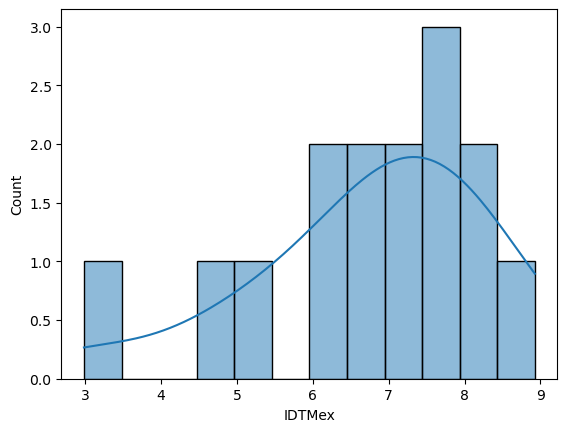

In [6]:
sns.histplot(data=IDTMex_grupos,x="IDTMex", kde=True,binwidth=0.5)
plt.show()

In [7]:
labels = ["Bajo","Medio","Alto"]
conds = [(IDTMex_grupos.IDTMex<6),(IDTMex_grupos.IDTMex<=7.5),(IDTMex_grupos.IDTMex>7.5)]
IDTMex_grupos["clasificacion"] = pd.Categorical(np.select(conds, labels), categories=labels)
IDTMex_grupos

,Grupo,acceso,uso,aptitudes,IDTMex,FAC_HOG,clasificacion
0,11,3.312564,2.267683,3.758340,2.983767,6984839,Bajo
4,23,5.100819,4.027355,5.339793,4.719228,92468,Bajo
1,20,5.651381,4.761301,4.995859,5.164245,17295201,Bajo
6,31,6.609744,5.262734,6.487024,6.046396,81353,Medio
3,22,6.417494,6.442622,5.417137,6.227474,110877,Medio
9,34,6.536871,6.997154,6.086750,6.630960,43151,Medio
8,33,7.316712,6.311659,6.315646,6.714477,7106718,Medio
11,41,6.971433,7.156436,7.934896,7.238127,46924,Medio
14,44,6.977416,7.522292,7.593757,7.318635,15830,Medio
5,30,8.512739,6.798167,6.885504,7.501463,138234,Alto


In [8]:
IDTMex_grupos.to_csv(f"{base_path}/long_IDTMex_desglosado_grupos_clasificados.csv", index=False)

## Indicadores

In [9]:
IDTMex_grupos_ind = pd.read_csv(f"{base_path}/long_IDTMex_indicadores_grupos.csv", index_col=0).drop("ESTRATO",axis=1)
IDTMex_grupos_ind = pd.merge(IDTMex_grupos["Grupo clasificacion".split()], IDTMex_grupos_ind,  on="Grupo".split())
IDTMex_grupos_ind

,Grupo,clasificacion,tel_fija,cel,compu,hog_internet,usr_internet,alambrica,inalambrica,alfabetas_proxy,bachillerato,universidad,FAC_HOG
0,11,Bajo,0.101001,0.812114,0.158894,0.253017,0.397718,0.192407,0.090180,0.865964,0.207750,0.053787,6984839
1,23,Bajo,0.203508,0.906141,0.413797,0.516882,0.647353,0.460354,0.100500,0.925147,0.447942,0.228849,92468
2,20,Bajo,0.343476,0.931092,0.398070,0.587914,0.693584,0.541352,0.193454,0.946786,0.393946,0.158026,17295201
3,31,Medio,0.534559,0.827025,0.545868,0.736445,0.696136,0.702691,0.179993,0.961351,0.580195,0.404560,81353
4,22,Medio,0.030800,0.974115,0.562082,1.000000,0.751342,0.971807,0.209638,0.964383,0.441955,0.218803,110877
5,34,Medio,0.018424,0.983059,0.613265,1.000000,0.772108,0.966930,0.360108,0.973540,0.516526,0.335959,43151
6,33,Medio,0.585109,0.956619,0.602359,0.782597,0.819848,0.755115,0.318535,0.979814,0.590343,0.324537,7106718
7,41,Medio,0.355959,0.913946,0.712493,0.806176,0.903495,0.802851,0.440585,0.991019,0.808540,0.580910,46924
8,44,Medio,0.061402,0.982817,0.746747,1.000000,0.847401,1.000000,0.409286,0.965014,0.792195,0.520919,15830
9,30,Alto,0.826996,0.967512,0.703365,0.907223,0.821667,0.877715,0.340068,0.984578,0.642421,0.438652,138234


In [10]:
indicadores = {
    'tel_fija':"Hogares con telefonia fija", "cel":"Hogares con al menos un celular", "compu":"Hogares con computadora","hog_internet":"Hogares con Internet",
    "usr_internet":"Usuarios de Internet", "alambrica":"Hogares con conexión\nalámbrica a Internet", "inalambrica":"Hogares con conexión\ninalámbrica a Internet",
    "alfabetas_proxy":"Residentes adultos que\ncursaron al menos la primaria", "bachillerato":"Residentes adultos que\ncursaron al menos la preparatoria","universidad":"Residentes mayores de 23 años que\ncursaron o cursan la universidad"
}

In [11]:
IDTMex_grupos_ind.rename(columns=indicadores).groupby("clasificacion").mean().drop("FAC_HOG Grupo".split(),axis=1).T

clasificacion,Bajo,Medio,Alto
Hogares con telefonia fija,0.215995,0.264376,0.892492
Hogares con al menos un celular,0.883115,0.939597,0.976674
Hogares con computadora,0.323587,0.630469,0.790529
Hogares con Internet,0.452604,0.887536,0.962670
Usuarios de Internet,0.579552,0.798388,0.870431
Hogares con conexión\nalámbrica a Internet,0.398038,0.866566,0.944259
Hogares con conexión\ninalámbrica a Internet,0.128045,0.319691,0.402594
Residentes adultos que\ncursaron al menos la primaria,0.912632,0.972520,0.982694
Residentes adultos que\ncursaron al menos la preparatoria,0.349879,0.621626,0.719719
Residentes mayores de 23 años que\ncursaron o cursan la universidad,0.146887,0.397615,0.511363


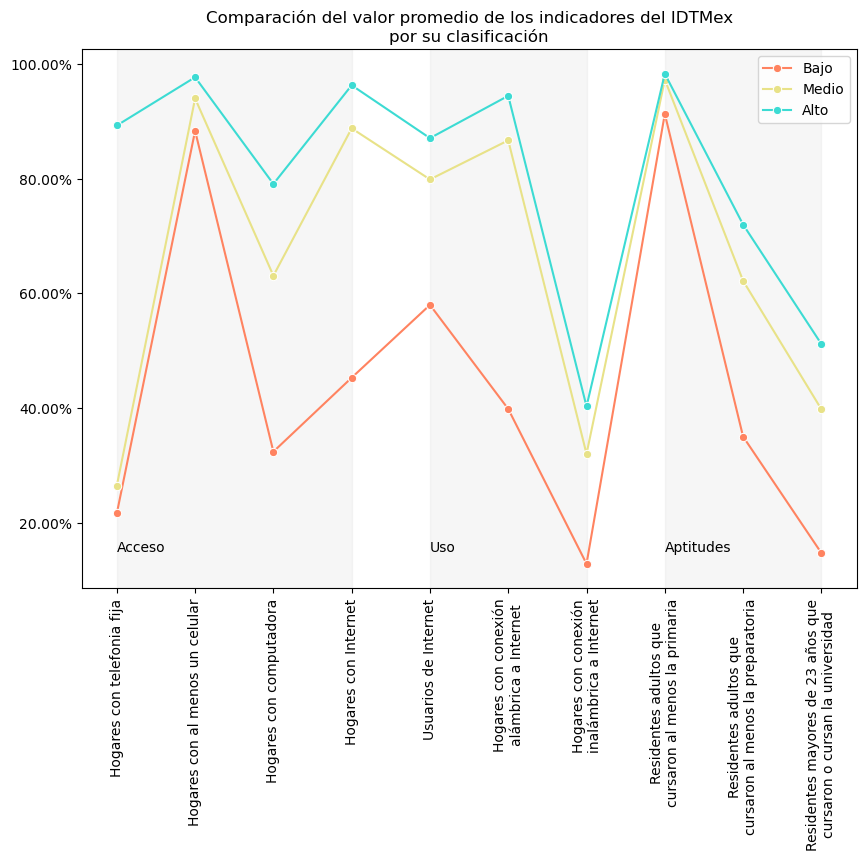

In [12]:
plt.figure(figsize=(10,7))
sns.lineplot(
    IDTMex_grupos_ind.rename(columns=indicadores).groupby("clasificacion").mean().drop("FAC_HOG Grupo".split(),axis=1).T,
    dashes=False, markers=["o"]*3, palette=["#FF8360","#E8E288","#3CDBD3"], 
)

plt.axvspan("Hogares con telefonia fija", "Hogares con Internet", color='#d4d4d4', alpha=0.20, lw=1)
plt.text("Hogares con telefonia fija",0.15,"Acceso")

plt.axvspan("Usuarios de Internet", "Hogares con conexión\ninalámbrica a Internet", color='#d3d3d3', alpha=0.20, lw=1)
plt.text("Usuarios de Internet",0.15,"Uso")

plt.axvspan("Residentes adultos que\ncursaron al menos la primaria", "Residentes mayores de 23 años que\ncursaron o cursan la universidad", color='#d3d3d3', alpha=0.20, lw=1)
plt.text("Residentes adultos que\ncursaron al menos la primaria",0.15,"Aptitudes")

plt.xticks(rotation=90)


plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.2%}'))

plt.legend()
plt.title("Comparación del valor promedio de los indicadores del IDTMex\npor su clasificación")
plt.show()


In [13]:
IDTMex_hog = pd.merge(endutih_completa, IDTMex_grupos.drop("FAC_HOG", axis=1), on="Grupo".split())
IDTMex_hog

,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P1_5_3,P2_1,P2_2,P2_3,...,P3_9_3,P3_10,P3_11,P3_12,FAC_HOGAR,acceso,uso,aptitudes,IDTMex,clasificacion
0,2,1,1,1,1,2,2,2,1,1.0,...,1.0,6.0,4.0,NaN,575,3.312564,2.267683,3.758340,2.983767,Bajo
1,2,1,1,1,1,2,2,2,1,1.0,...,1.0,1.0,NaN,1.0,575,3.312564,2.267683,3.758340,2.983767,Bajo
2,2,1,1,1,1,1,1,6,1,1.0,...,1.0,1.0,NaN,1.0,575,3.312564,2.267683,3.758340,2.983767,Bajo
3,2,1,1,1,1,1,1,6,1,1.0,...,1.0,1.0,NaN,1.0,575,3.312564,2.267683,3.758340,2.983767,Bajo
4,2,1,1,1,1,1,1,6,1,1.0,...,1.0,1.0,NaN,1.0,575,3.312564,2.267683,3.758340,2.983767,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205276,3,1,2,1,1,1,1,4,1,1.0,...,1.0,6.0,4.0,NaN,379,6.971433,7.156436,7.934896,7.238127,Medio
205277,3,1,2,1,1,1,1,4,1,1.0,...,1.0,5.0,4.0,NaN,379,6.971433,7.156436,7.934896,7.238127,Medio
205278,3,1,2,1,1,1,1,4,1,1.0,...,1.0,5.0,4.0,NaN,379,6.971433,7.156436,7.934896,7.238127,Medio
205279,3,1,2,1,1,2,2,1,1,1.0,...,1.0,1.0,NaN,1.0,343,6.971433,7.156436,7.934896,7.238127,Medio


# COMPORTAMIENTO DE VARIABLES

In [14]:
max_nivel = IDTMex_hog[IDTMex_hog.NIVEL!=99].groupby(["UPM","VIV_SEL", "HOGAR"])[['NIVEL']].max()
max_nivel.columns = "maxNIVEL".split()
max_nivel = max_nivel.reset_index()
max_nivel

,UPM,VIV_SEL,HOGAR,maxNIVEL
0,100026,2,1,8.0
1,100026,3,1,8.0
2,100026,4,1,8.0
3,100026,5,1,6.0
4,100028,2,1,6.0
...,...,...,...,...
58131,3260770,16,1,8.0
58132,3260770,17,1,6.0
58133,3260770,18,1,6.0
58134,3260770,19,1,8.0


In [15]:
representante_hogar = pd.merge(IDTMex_hog, max_nivel, on=["UPM","VIV_SEL", "HOGAR"])
representante_hogar = representante_hogar.loc[representante_hogar["NIVEL"]==representante_hogar["maxNIVEL"]]
representante_hogar = representante_hogar.groupby(["UPM","VIV_SEL", "HOGAR"]).sample(n=1)
representante_hogar

,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P1_5_3,P2_1,P2_2,P2_3,...,P3_10,P3_11,P3_12,FAC_HOGAR,acceso,uso,aptitudes,IDTMex,clasificacion,maxNIVEL
151954,3,1,1,1,1,1,1,5,1,1.0,...,1.0,NaN,1.0,200,7.316712,6.311659,6.315646,6.714477,Medio,8.0
151959,3,1,1,1,1,2,1,4,1,1.0,...,5.0,4.0,NaN,200,7.316712,6.311659,6.315646,6.714477,Medio,8.0
151960,2,1,1,1,1,2,2,1,1,1.0,...,1.0,NaN,1.0,200,7.316712,6.311659,6.315646,6.714477,Medio,8.0
151962,2,1,1,1,1,1,1,6,1,1.0,...,1.0,NaN,1.0,200,7.316712,6.311659,6.315646,6.714477,Medio,6.0
151967,3,1,1,1,1,1,1,1,1,1.0,...,4.0,4.0,NaN,173,7.316712,6.311659,6.315646,6.714477,Medio,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144007,3,1,1,1,1,1,2,3,1,1.0,...,6.0,4.0,NaN,185,5.651381,4.761301,4.995859,5.164245,Bajo,8.0
144009,2,1,1,1,1,1,2,3,1,1.0,...,1.0,NaN,1.0,185,5.651381,4.761301,4.995859,5.164245,Bajo,6.0
144015,2,1,1,1,1,1,1,4,1,1.0,...,5.0,4.0,NaN,185,5.651381,4.761301,4.995859,5.164245,Bajo,6.0
144287,3,1,1,1,1,1,1,7,1,1.0,...,1.0,NaN,1.0,185,5.651381,4.761301,4.995859,5.164245,Bajo,8.0


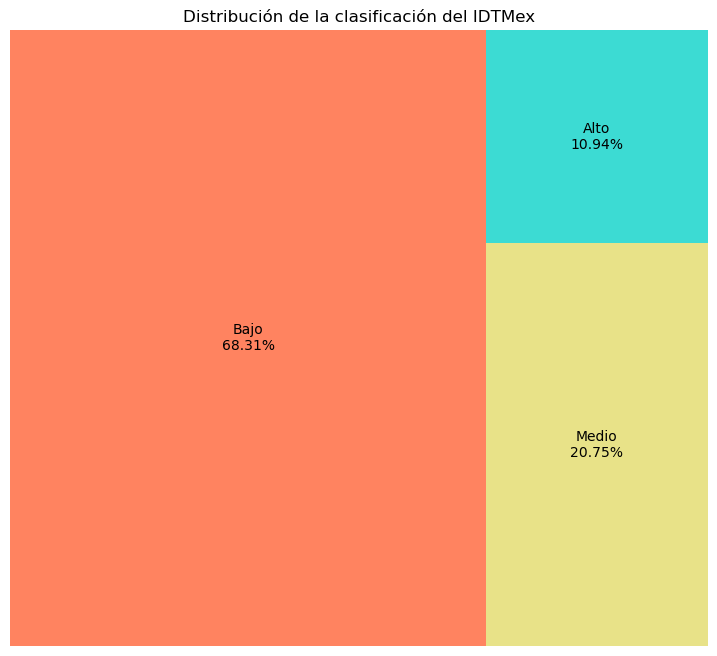

In [16]:
plt.figure(figsize=(9,8))

df_tmp = representante_hogar.groupby("clasificacion")[["FAC_HOG"]].sum().reset_index()
df_tmp = df_tmp[df_tmp["FAC_HOG"]>0]
df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()
labs = [f"{clas}\n{perc:.2%}" for clas,perc in zip(df_tmp["clasificacion"], df_tmp["perc"])]

squarify.plot(sizes=df_tmp['FAC_HOG'], label=labs, color=["#FF8360","#E8E288","#3CDBD3"])
plt.axis('off')
plt.title(f"Distribución de la clasificación del IDTMex")
plt.show()

## Nivel Educativo

In [17]:
niveles = ("Ninguno", "Preescolar", "Primaria", "Secundaria","Normal básica", "Estudio técnico", "Preparatoria", "Estudio técnico superior", "Licenciatura o ingeniería", "Especialidad", "Maestría", "Doctorado", "No sabe")
nums = list(range(12)) + [99]
niveles = {num:nivel for num,nivel in zip(nums,niveles)}
niveles

{0: 'Ninguno',
 1: 'Preescolar',
 2: 'Primaria',
 3: 'Secundaria',
 4: 'Normal básica',
 5: 'Estudio técnico',
 6: 'Preparatoria',
 7: 'Estudio técnico superior',
 8: 'Licenciatura o ingeniería',
 9: 'Especialidad',
 10: 'Maestría',
 11: 'Doctorado',
 99: 'No sabe'}

In [18]:
nivel_hogar = representante_hogar.groupby(["UPM","VIV_SEL", "HOGAR"]).sample(1)
nivel_hogar

,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P1_5_3,P2_1,P2_2,P2_3,...,P3_10,P3_11,P3_12,FAC_HOGAR,acceso,uso,aptitudes,IDTMex,clasificacion,maxNIVEL
151954,3,1,1,1,1,1,1,5,1,1.0,...,1.0,NaN,1.0,200,7.316712,6.311659,6.315646,6.714477,Medio,8.0
151959,3,1,1,1,1,2,1,4,1,1.0,...,5.0,4.0,NaN,200,7.316712,6.311659,6.315646,6.714477,Medio,8.0
151960,2,1,1,1,1,2,2,1,1,1.0,...,1.0,NaN,1.0,200,7.316712,6.311659,6.315646,6.714477,Medio,8.0
151962,2,1,1,1,1,1,1,6,1,1.0,...,1.0,NaN,1.0,200,7.316712,6.311659,6.315646,6.714477,Medio,6.0
151967,3,1,1,1,1,1,1,1,1,1.0,...,4.0,4.0,NaN,173,7.316712,6.311659,6.315646,6.714477,Medio,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144007,3,1,1,1,1,1,2,3,1,1.0,...,6.0,4.0,NaN,185,5.651381,4.761301,4.995859,5.164245,Bajo,8.0
144009,2,1,1,1,1,1,2,3,1,1.0,...,1.0,NaN,1.0,185,5.651381,4.761301,4.995859,5.164245,Bajo,6.0
144015,2,1,1,1,1,1,1,4,1,1.0,...,5.0,4.0,NaN,185,5.651381,4.761301,4.995859,5.164245,Bajo,6.0
144287,3,1,1,1,1,1,1,7,1,1.0,...,1.0,NaN,1.0,185,5.651381,4.761301,4.995859,5.164245,Bajo,8.0


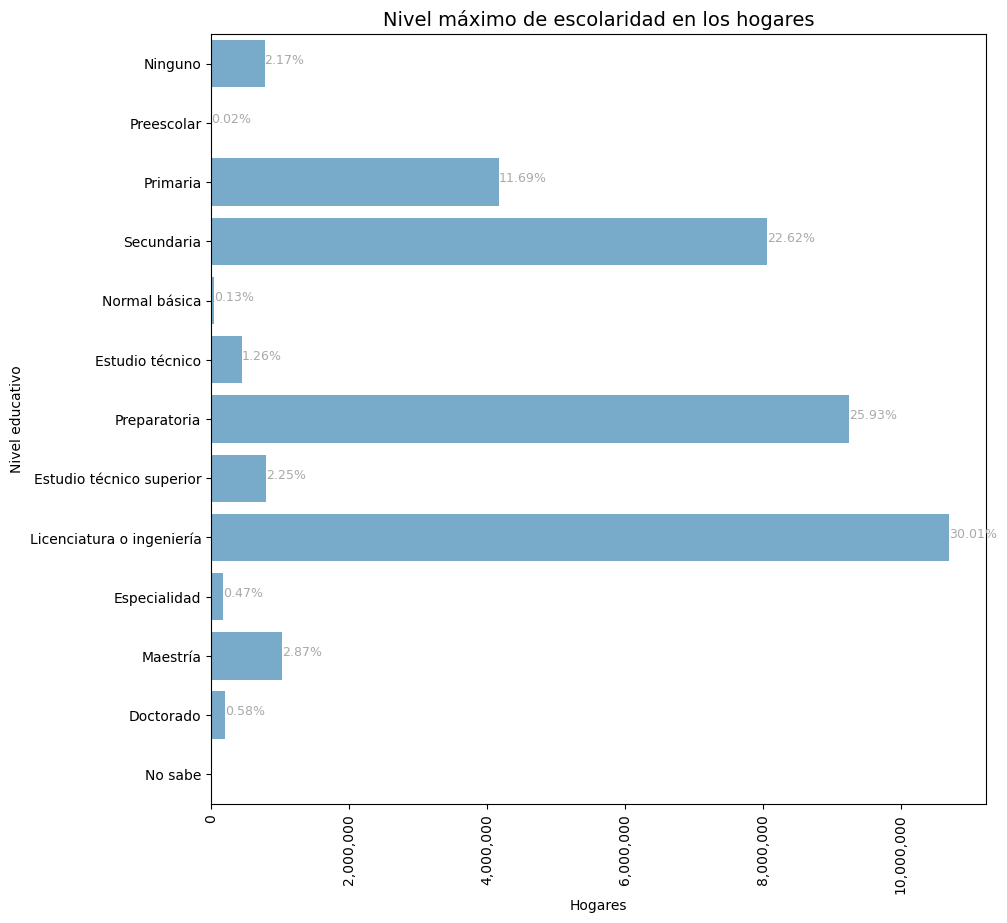

In [19]:
plt.figure(figsize=(10,10))

df_tmp = nivel_hogar.groupby("NIVEL")[["FAC_HOG"]].sum().reset_index()
df_tmp["NIVEL"] = pd.Categorical(df_tmp["NIVEL"].replace(niveles, regex=True), categories=niveles.values())
df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()

labs = [f"{clas}\n{perc:.2%}" for clas,perc in zip(df_tmp["NIVEL"], df_tmp["perc"])]
palette = sns.palettes.color_palette("Blues",df_tmp.NIVEL.nunique())
colors = [color for color in palette.as_hex()]

sns.barplot(df_tmp, y="NIVEL", x="FAC_HOG", color="#6aaed6")
for idx in df_tmp.index:
    nivel = df_tmp.loc[idx,["NIVEL"]].to_list()[0]
    fac_hog = df_tmp.loc[idx,["FAC_HOG"]].to_list()[0]
    perc = df_tmp.loc[idx,["perc"]].to_list()[0]
    plt.text(y=nivel , x =fac_hog , s=f"{perc:.2%}", color="darkgray", fontsize=9)

plt.ylabel("Nivel educativo")
plt.xlabel("Hogares")
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


plt.title("Nivel máximo de escolaridad en los hogares", size=14)
plt.show()

### NIVEL - clasificacion

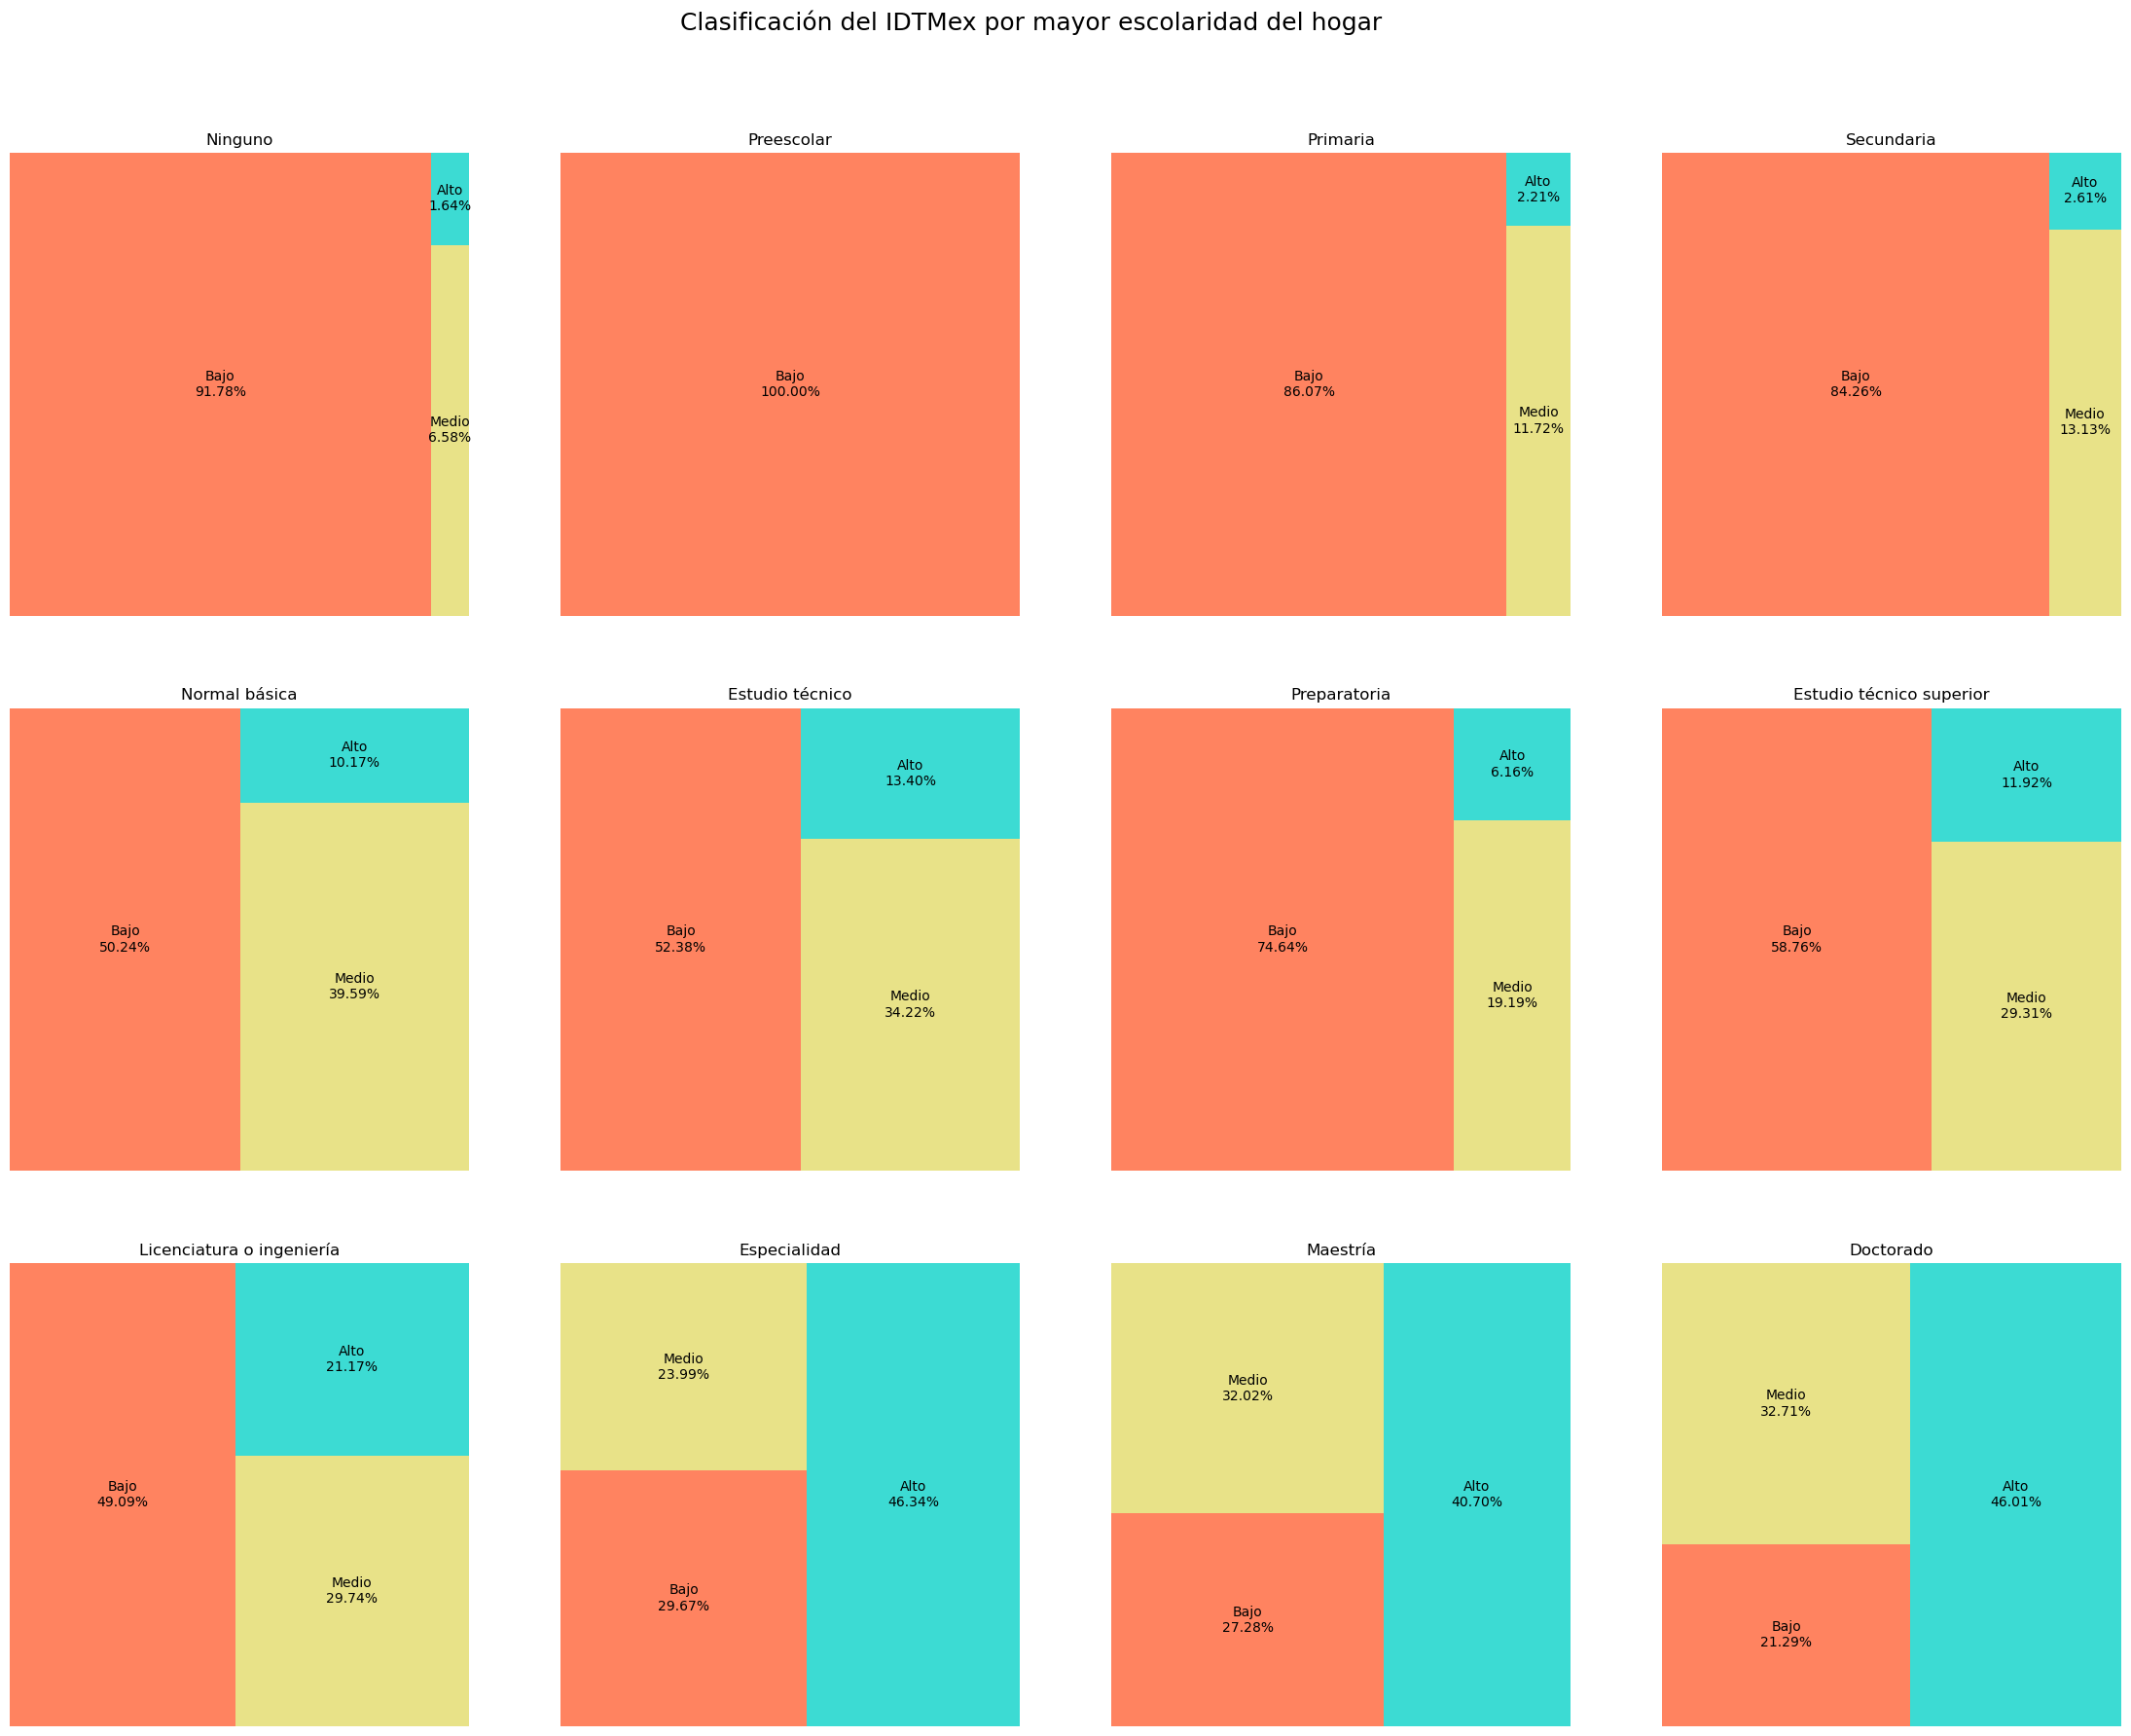

In [20]:
plt.figure(figsize=(28,21))
for i,nivel in enumerate(sorted(nivel_hogar["NIVEL"].unique())):
    plt.subplot(3,4,i+1)
    df_tmp = nivel_hogar[nivel_hogar.NIVEL==nivel].groupby("clasificacion")[["FAC_HOG"]].sum().reset_index()
    df_tmp = df_tmp[df_tmp["FAC_HOG"]>0]
    df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()
    labs = [f"{clas}\n{perc:.2%}" for clas,perc in zip(df_tmp["clasificacion"], df_tmp["perc"])]
    squarify.plot(sizes=df_tmp['FAC_HOG'], label=labs, color=["#FF8360","#E8E288","#3CDBD3"])
    plt.axis('off')
    plt.title(f"{niveles[nivel]}")
plt.suptitle("Clasificación del IDTMex por mayor escolaridad del hogar", y=0.95, size=18)
plt.show()

### Clasificacion - NIVEL

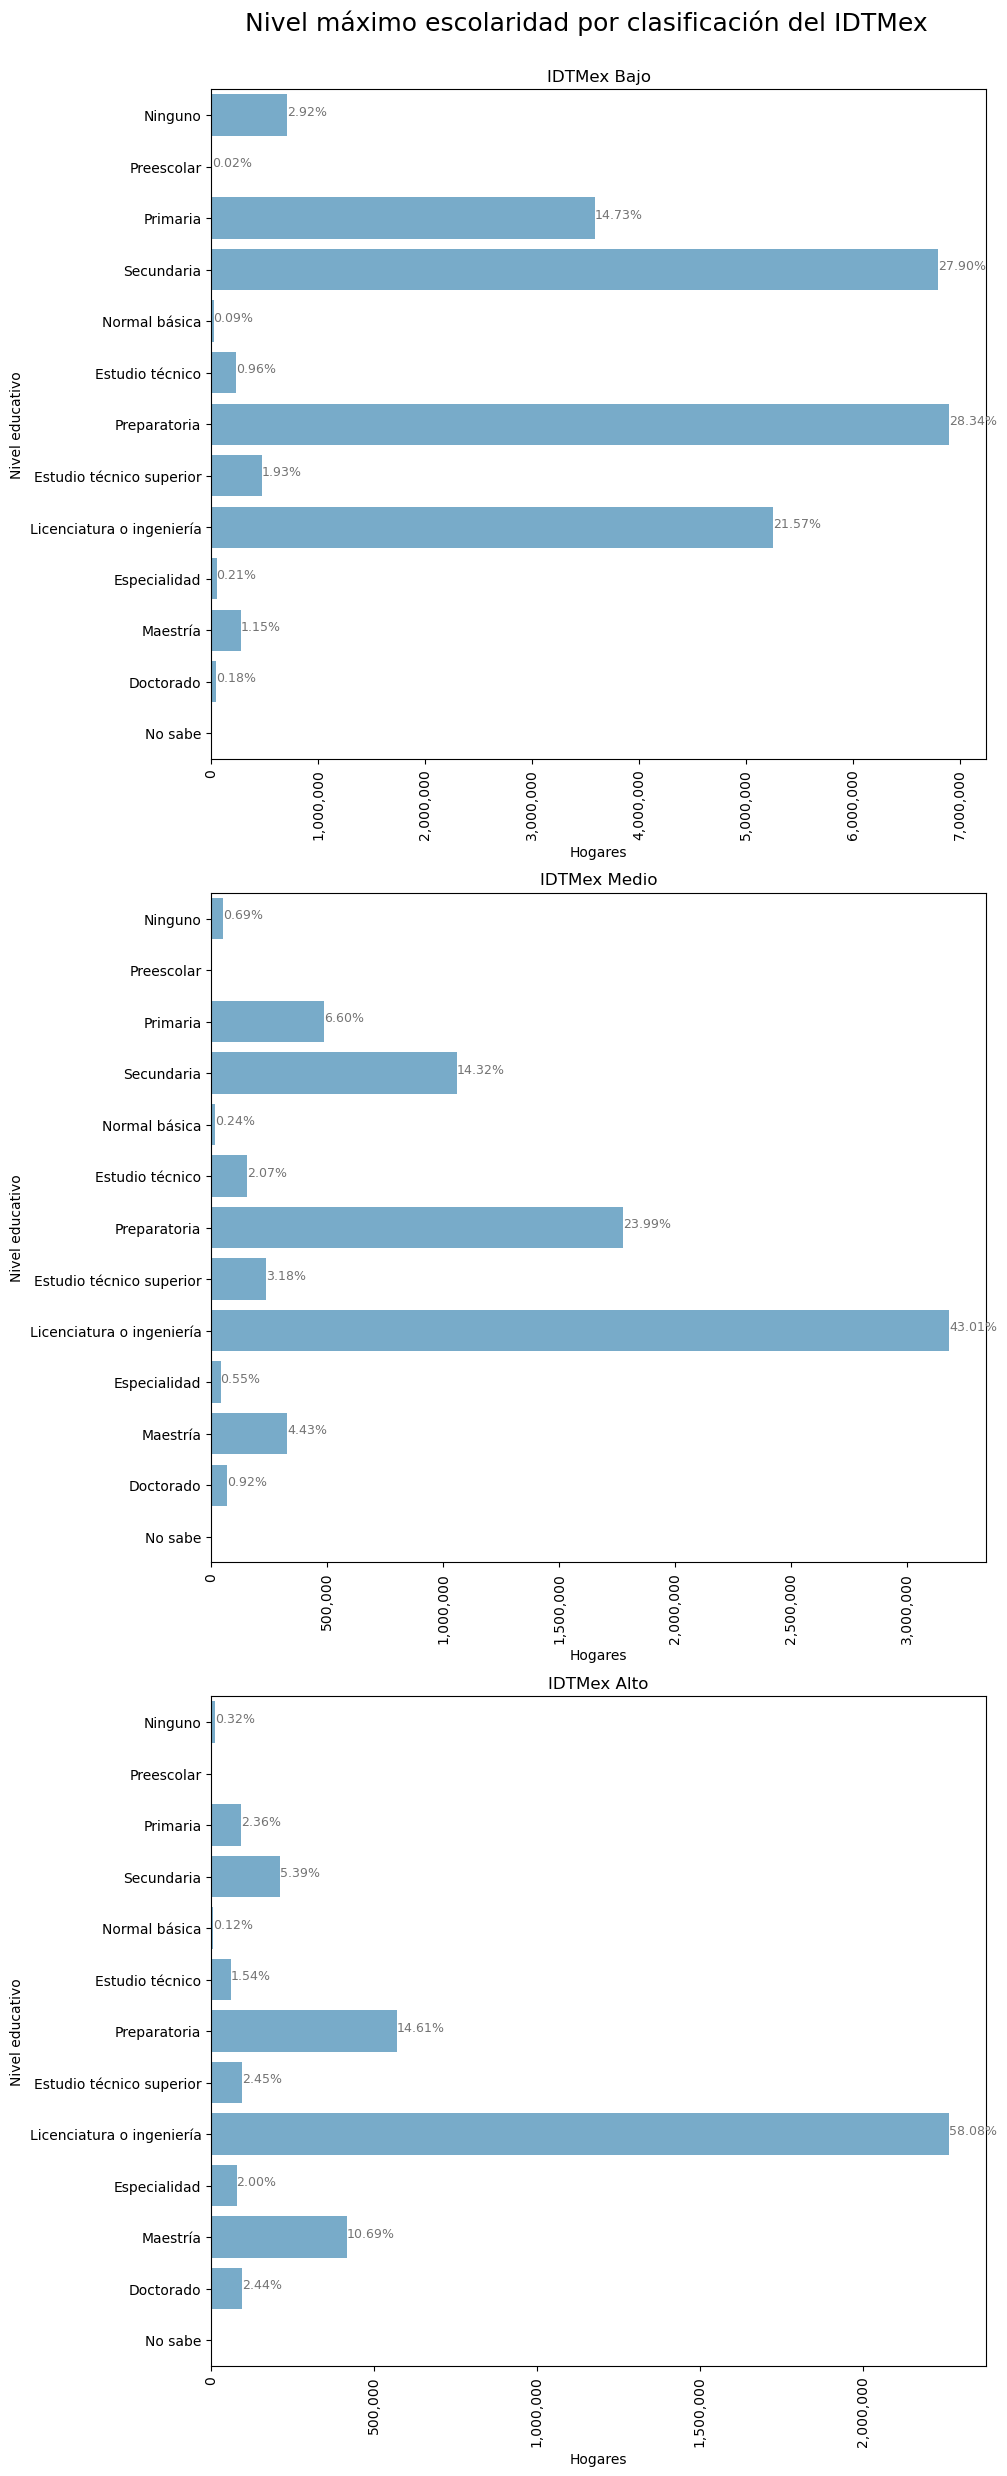

In [21]:
plt.figure(figsize=(10,40))
for i,clasificacion in enumerate(labels):
    plt.subplot(4,1,i+1)
    
    df_tmp = nivel_hogar[nivel_hogar.clasificacion==clasificacion].groupby("NIVEL")[["FAC_HOG"]].sum().reset_index()
    df_tmp["NIVEL"] = pd.Categorical(df_tmp["NIVEL"].replace(niveles, regex=True), categories=niveles.values())
    df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()
    
    sns.barplot(df_tmp, y="NIVEL", x="FAC_HOG", color="#6aaed6")
    for idx in df_tmp.index:
        nivel = df_tmp.loc[idx,["NIVEL"]].to_list()[0]
        fac_hog = df_tmp.loc[idx,["FAC_HOG"]].to_list()[0]
        perc = df_tmp.loc[idx,["perc"]].to_list()[0]
        plt.text(y=nivel , x =fac_hog , s=f"{perc:.2%}", color="#737373", fontsize=9)
    
    plt.ylabel("Nivel educativo")
    plt.xlabel("Hogares")
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    
    
    plt.title(f"IDTMex {clasificacion}")

    plt.suptitle("Nivel máximo escolaridad por clasificación del IDTMex", y=0.9, size=18)
plt.show()


# DESCRIPCIÓN DE LOS HOGARES POR CLASIFICACION DE IDTMex

In [22]:
jefe_hog = IDTMex_hog.loc[(IDTMex_hog.PAREN==1)&(IDTMex_hog.NIVEL!=99)].drop_duplicates()
jefe_hog = pd.merge(jefe_hog, max_nivel, on = ["UPM","VIV_SEL", "HOGAR"],)
jefe_hog

,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P1_5_3,P2_1,P2_2,P2_3,...,P3_10,P3_11,P3_12,FAC_HOGAR,acceso,uso,aptitudes,IDTMex,clasificacion,maxNIVEL
0,2,1,1,1,1,2,2,2,1,1.0,...,6.0,4.0,NaN,575,3.312564,2.267683,3.758340,2.983767,Bajo,2.0
1,2,1,1,1,1,1,1,6,1,1.0,...,1.0,NaN,1.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,6.0
2,2,1,1,1,1,2,2,6,1,1.0,...,8.0,2.0,4.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,3.0
3,2,1,1,1,1,1,2,7,1,1.0,...,1.0,NaN,1.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,3.0
4,2,1,1,1,1,1,1,6,1,1.0,...,1.0,NaN,4.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57844,3,1,1,1,1,1,1,2,1,1.0,...,1.0,NaN,1.0,439,6.971433,7.156436,7.934896,7.238127,Medio,8.0
57845,2,1,1,1,1,1,2,1,1,1.0,...,8.0,4.0,NaN,1547,6.971433,7.156436,7.934896,7.238127,Medio,2.0
57846,3,1,2,1,1,1,1,4,1,1.0,...,1.0,NaN,1.0,379,6.971433,7.156436,7.934896,7.238127,Medio,10.0
57847,3,1,2,1,1,2,2,1,1,1.0,...,1.0,NaN,1.0,343,6.971433,7.156436,7.934896,7.238127,Medio,8.0


In [23]:
jefe_hog.to_csv(f"{base_path}/jefes_delhogar.csv", index=False)

In [24]:
rangos_edad = "00-04|05-09|10-14|15-19|20-24|25-29|30-34|35-39|40-44|45-49|50-54|55-59|60-64|65-69|70-74|75-79|80-84|85 y más".split("|")
conds = [(jefe_hog.EDAD<=4+i) for i in range(0,82,5)] + [(jefe_hog.EDAD>=85)]

In [25]:
jefe_hog.insert(102, "rgo_edad",
                pd.Categorical(np.select(conds, rangos_edad),categories=reversed(rangos_edad))
               )
jefe_hog

,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P1_5_3,P2_1,P2_2,P2_3,...,P3_11,P3_12,FAC_HOGAR,acceso,uso,aptitudes,IDTMex,clasificacion,maxNIVEL,rgo_edad
0,2,1,1,1,1,2,2,2,1,1.0,...,4.0,NaN,575,3.312564,2.267683,3.758340,2.983767,Bajo,2.0,50-54
1,2,1,1,1,1,1,1,6,1,1.0,...,NaN,1.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,6.0,35-39
2,2,1,1,1,1,2,2,6,1,1.0,...,2.0,4.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,3.0,45-49
3,2,1,1,1,1,1,2,7,1,1.0,...,NaN,1.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,3.0,35-39
4,2,1,1,1,1,1,1,6,1,1.0,...,NaN,4.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,8.0,40-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57844,3,1,1,1,1,1,1,2,1,1.0,...,NaN,1.0,439,6.971433,7.156436,7.934896,7.238127,Medio,8.0,55-59
57845,2,1,1,1,1,1,2,1,1,1.0,...,4.0,NaN,1547,6.971433,7.156436,7.934896,7.238127,Medio,2.0,70-74
57846,3,1,2,1,1,1,1,4,1,1.0,...,NaN,1.0,379,6.971433,7.156436,7.934896,7.238127,Medio,10.0,40-44
57847,3,1,2,1,1,2,2,1,1,1.0,...,NaN,1.0,343,6.971433,7.156436,7.934896,7.238127,Medio,8.0,60-64


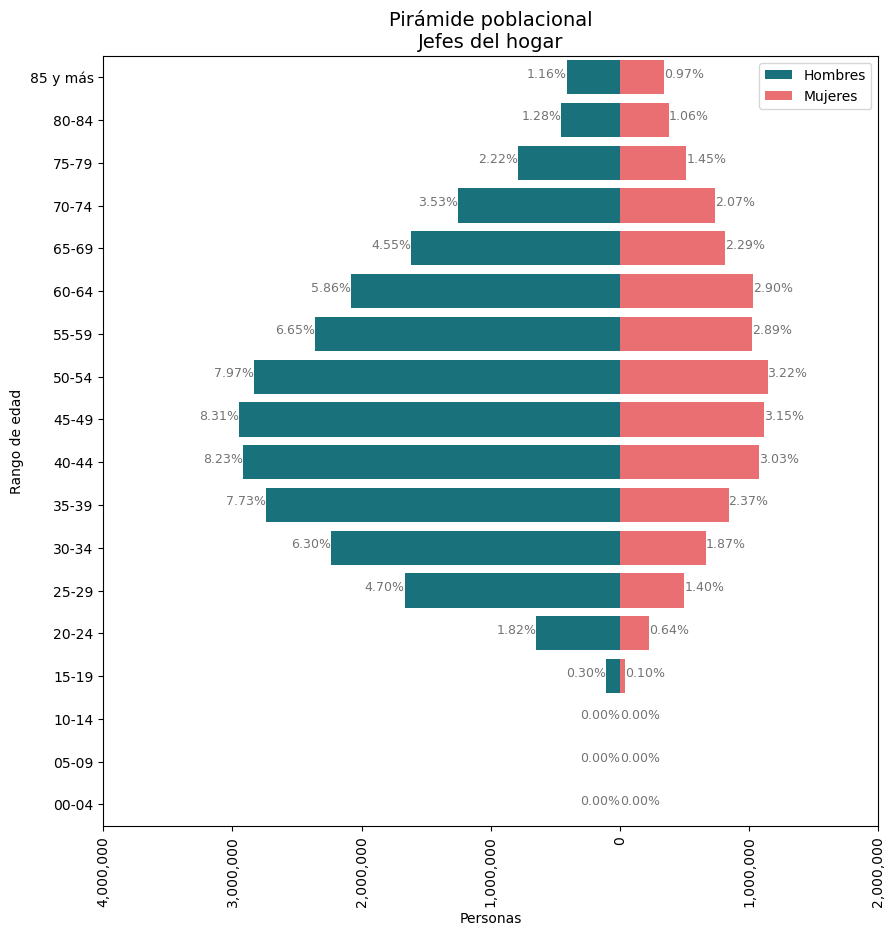

In [26]:
plt.figure(figsize=(10,10))
df_tmp = jefe_hog.groupby(["rgo_edad","SEXO"])[["FAC_HOGAR"]].sum().reset_index()
df_tmp["perc"] = df_tmp["FAC_HOGAR"]/df_tmp["FAC_HOGAR"].sum()
df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"] = -df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"]
sns.barplot(df_tmp[df_tmp.SEXO==1], y="rgo_edad", x="FAC_HOGAR", color="#087E8B",label="Hombres")
for idx in df_tmp[df_tmp.SEXO==1].index:
    nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
    FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
    perc = df_tmp.loc[idx,["perc"]].to_list()[0]
    plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9,horizontalalignment="right")



sns.barplot(df_tmp[df_tmp.SEXO==2], y="rgo_edad", x="FAC_HOGAR", color="#FF5A5F",label="Mujeres")
for idx in df_tmp[df_tmp.SEXO==2].index:
    nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
    FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
    perc = df_tmp.loc[idx,["perc"]].to_list()[0]
    plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9)

plt.ylabel("Rango de edad")
plt.xlabel("Personas")
curr_ticks = plt.gca().get_xticks()
plt.xticks(ticks=curr_ticks,labels=[f"{abs(x):,.0f}" for x in curr_ticks],rotation=90)

#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.legend()
plt.title("Pirámide poblacional\nJefes del hogar", size=14)
plt.show()


## BAJO

In [27]:
bajo = jefe_hog[jefe_hog["clasificacion"]=="Bajo"]
bajo

,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P1_5_3,P2_1,P2_2,P2_3,...,P3_11,P3_12,FAC_HOGAR,acceso,uso,aptitudes,IDTMex,clasificacion,maxNIVEL,rgo_edad
0,2,1,1,1,1,2,2,2,1,1.0,...,4.0,NaN,575,3.312564,2.267683,3.758340,2.983767,Bajo,2.0,50-54
1,2,1,1,1,1,1,1,6,1,1.0,...,NaN,1.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,6.0,35-39
2,2,1,1,1,1,2,2,6,1,1.0,...,2.0,4.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,3.0,45-49
3,2,1,1,1,1,1,2,7,1,1.0,...,NaN,1.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,3.0,35-39
4,2,1,1,1,1,1,1,6,1,1.0,...,NaN,4.0,575,3.312564,2.267683,3.758340,2.983767,Bajo,8.0,40-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40735,3,1,1,1,1,1,2,2,1,1.0,...,NaN,1.0,240,5.100819,4.027355,5.339793,4.719228,Bajo,3.0,35-39
40736,2,1,2,1,2,1,2,7,1,1.0,...,4.0,NaN,290,5.100819,4.027355,5.339793,4.719228,Bajo,6.0,80-84
40737,2,2,1,1,2,1,2,3,1,1.0,...,NaN,1.0,264,5.100819,4.027355,5.339793,4.719228,Bajo,3.0,80-84
40738,2,2,1,1,1,1,2,4,1,1.0,...,NaN,1.0,248,5.100819,4.027355,5.339793,4.719228,Bajo,3.0,35-39


### SEXO Y EDAD

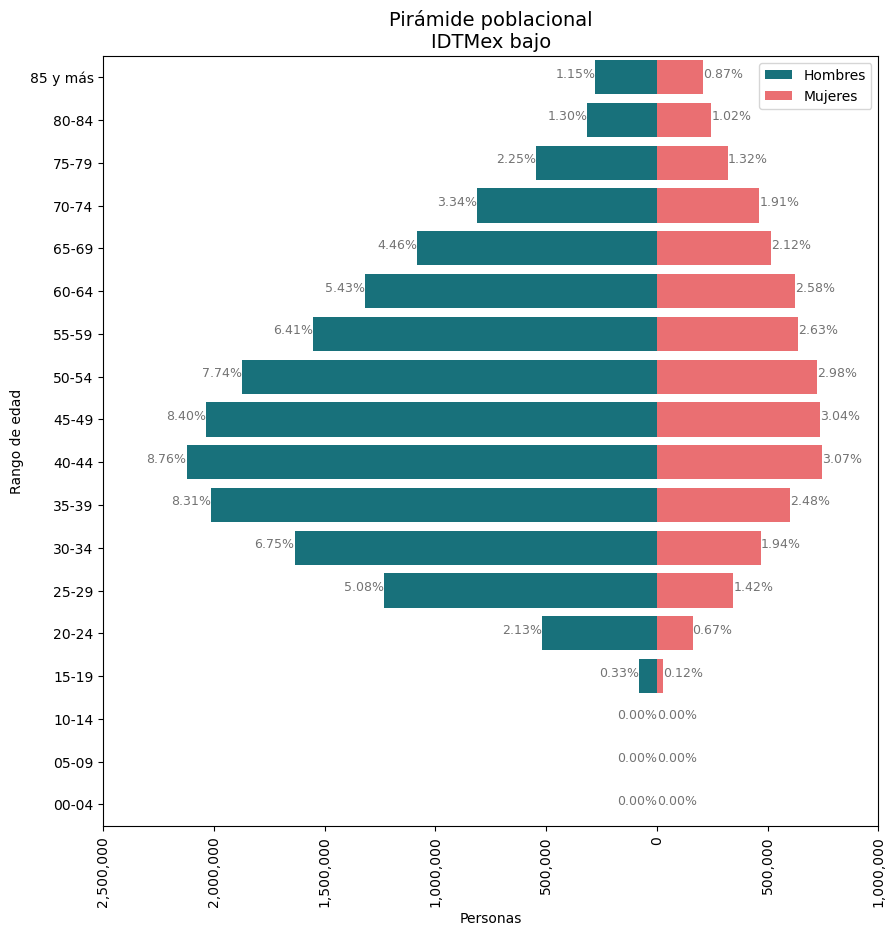

In [28]:
plt.figure(figsize=(10,10))
df_tmp = bajo.groupby(["rgo_edad","SEXO"])[["FAC_HOGAR"]].sum().reset_index()
df_tmp["perc"] = df_tmp["FAC_HOGAR"]/df_tmp["FAC_HOGAR"].sum()
df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"] = -df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"]
sns.barplot(df_tmp[df_tmp.SEXO==1], y="rgo_edad", x="FAC_HOGAR", color="#087E8B",label="Hombres")
for idx in df_tmp[df_tmp.SEXO==1].index:
    nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
    FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
    perc = df_tmp.loc[idx,["perc"]].to_list()[0]
    plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9,horizontalalignment="right")



sns.barplot(df_tmp[df_tmp.SEXO==2], y="rgo_edad", x="FAC_HOGAR", color="#FF5A5F",label="Mujeres")
for idx in df_tmp[df_tmp.SEXO==2].index:
    nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
    FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
    perc = df_tmp.loc[idx,["perc"]].to_list()[0]
    plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9)

plt.ylabel("Rango de edad")
plt.xlabel("Personas")
curr_ticks = plt.gca().get_xticks()
plt.xticks(ticks=curr_ticks,labels=[f"{abs(x):,.0f}" for x in curr_ticks],rotation=90)

#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.legend()
plt.title("Pirámide poblacional\nIDTMex bajo", size=14)
plt.show()


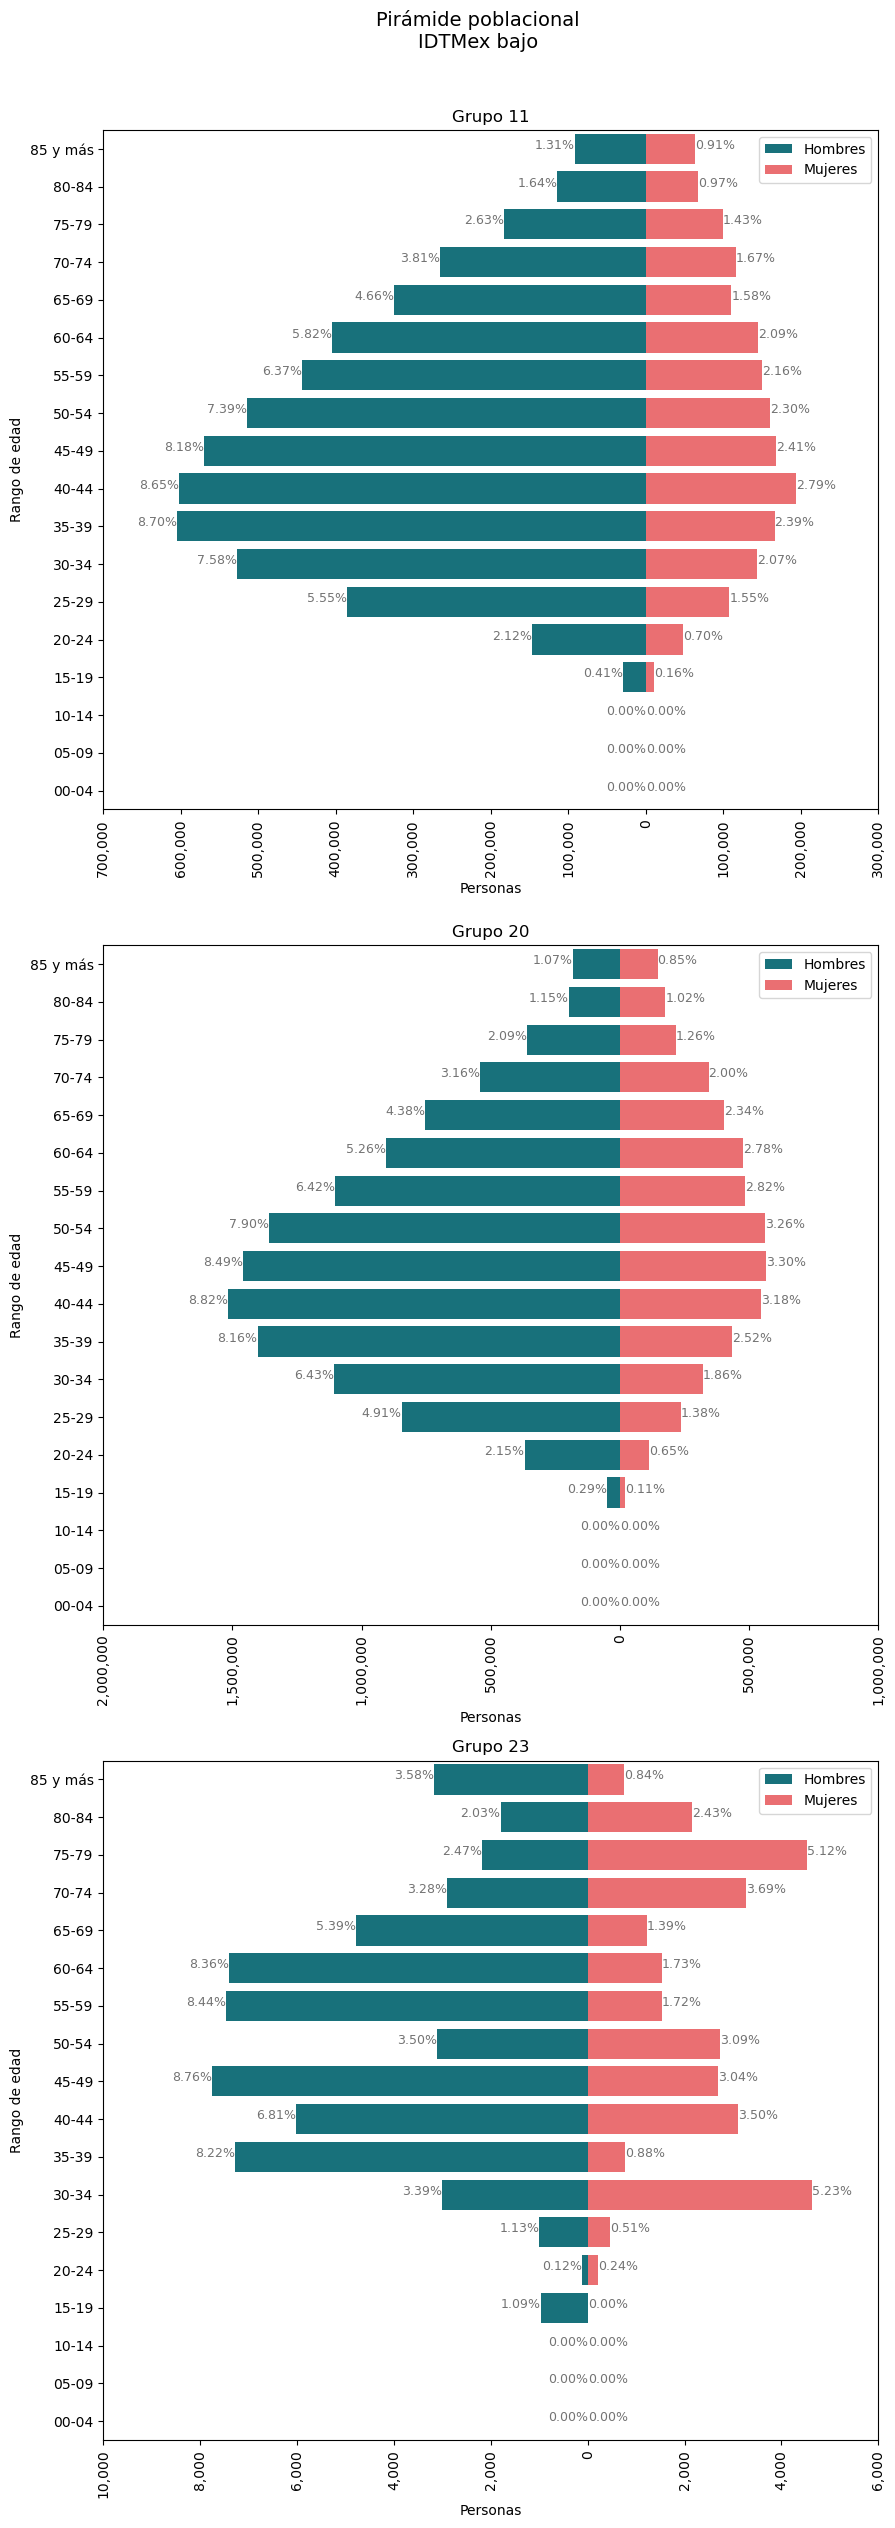

In [29]:
gpos = bajo["Grupo"].nunique()

plt.figure(figsize=(10,10*gpos))


for i,grupo in enumerate(bajo["Grupo"].unique()):
    plt.subplot(gpos,1,i+1)
    df_tmp = bajo[bajo["Grupo"] == grupo].groupby(["rgo_edad","SEXO"])[["FAC_HOGAR"]].sum().reset_index()
    df_tmp["perc"] = df_tmp["FAC_HOGAR"]/df_tmp["FAC_HOGAR"].sum()
    df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"] = -df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"]
    sns.barplot(df_tmp[df_tmp.SEXO==1], y="rgo_edad", x="FAC_HOGAR", color="#087E8B",label="Hombres")
    for idx in df_tmp[df_tmp.SEXO==1].index:
        nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
        FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
        perc = df_tmp.loc[idx,["perc"]].to_list()[0]
        plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9,horizontalalignment="right")



    sns.barplot(df_tmp[df_tmp.SEXO==2], y="rgo_edad", x="FAC_HOGAR", color="#FF5A5F",label="Mujeres")
    for idx in df_tmp[df_tmp.SEXO==2].index:
        nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
        FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
        perc = df_tmp.loc[idx,["perc"]].to_list()[0]
        plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9)

    plt.ylabel("Rango de edad")
    plt.xlabel("Personas")
    curr_ticks = plt.gca().get_xticks()
    plt.xticks(ticks=curr_ticks,labels=[f"{abs(x):,.0f}" for x in curr_ticks],rotation=90)
    
    plt.title(f"Grupo {grupo}")

#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.legend()
plt.suptitle("Pirámide poblacional\nIDTMex bajo", size=14, y=0.92)
plt.show()


### NIVEL EDUCATIVO MAXIMO

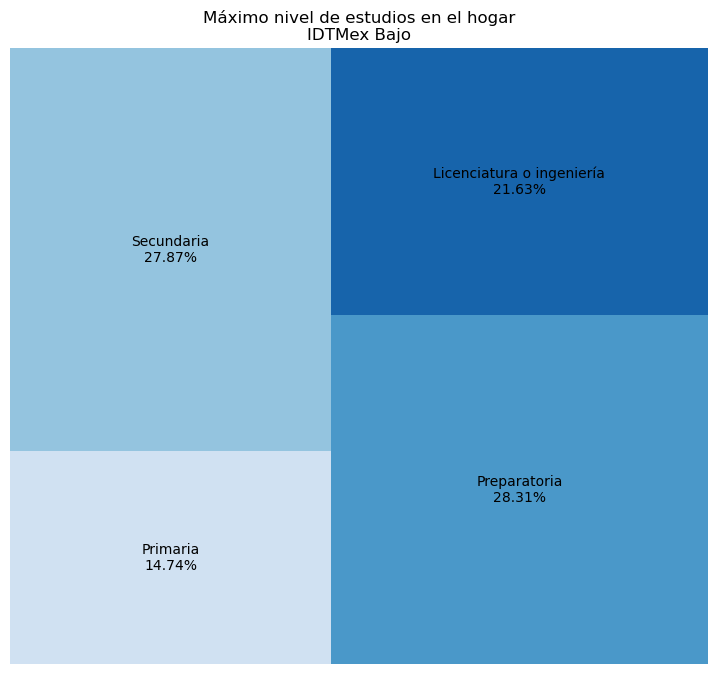

In [30]:
plt.figure(figsize=(9,8))
df_tmp = bajo.groupby("maxNIVEL")[["FAC_HOG"]].sum().reset_index()
df_tmp = df_tmp[df_tmp["FAC_HOG"]>0]
df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()
df_tmp = df_tmp[df_tmp.maxNIVEL.isin([2,3,6,8])]
labs = [f"{niveles[clas]}\n{perc:.2%}" for clas,perc in zip(df_tmp["maxNIVEL"], df_tmp["perc"])]
squarify.plot(sizes=df_tmp['FAC_HOG'], label=labs, color=sns.color_palette("Blues",4))
plt.axis('off')
plt.title(f"Máximo nivel de estudios en el hogar\nIDTMex Bajo")
plt.show()

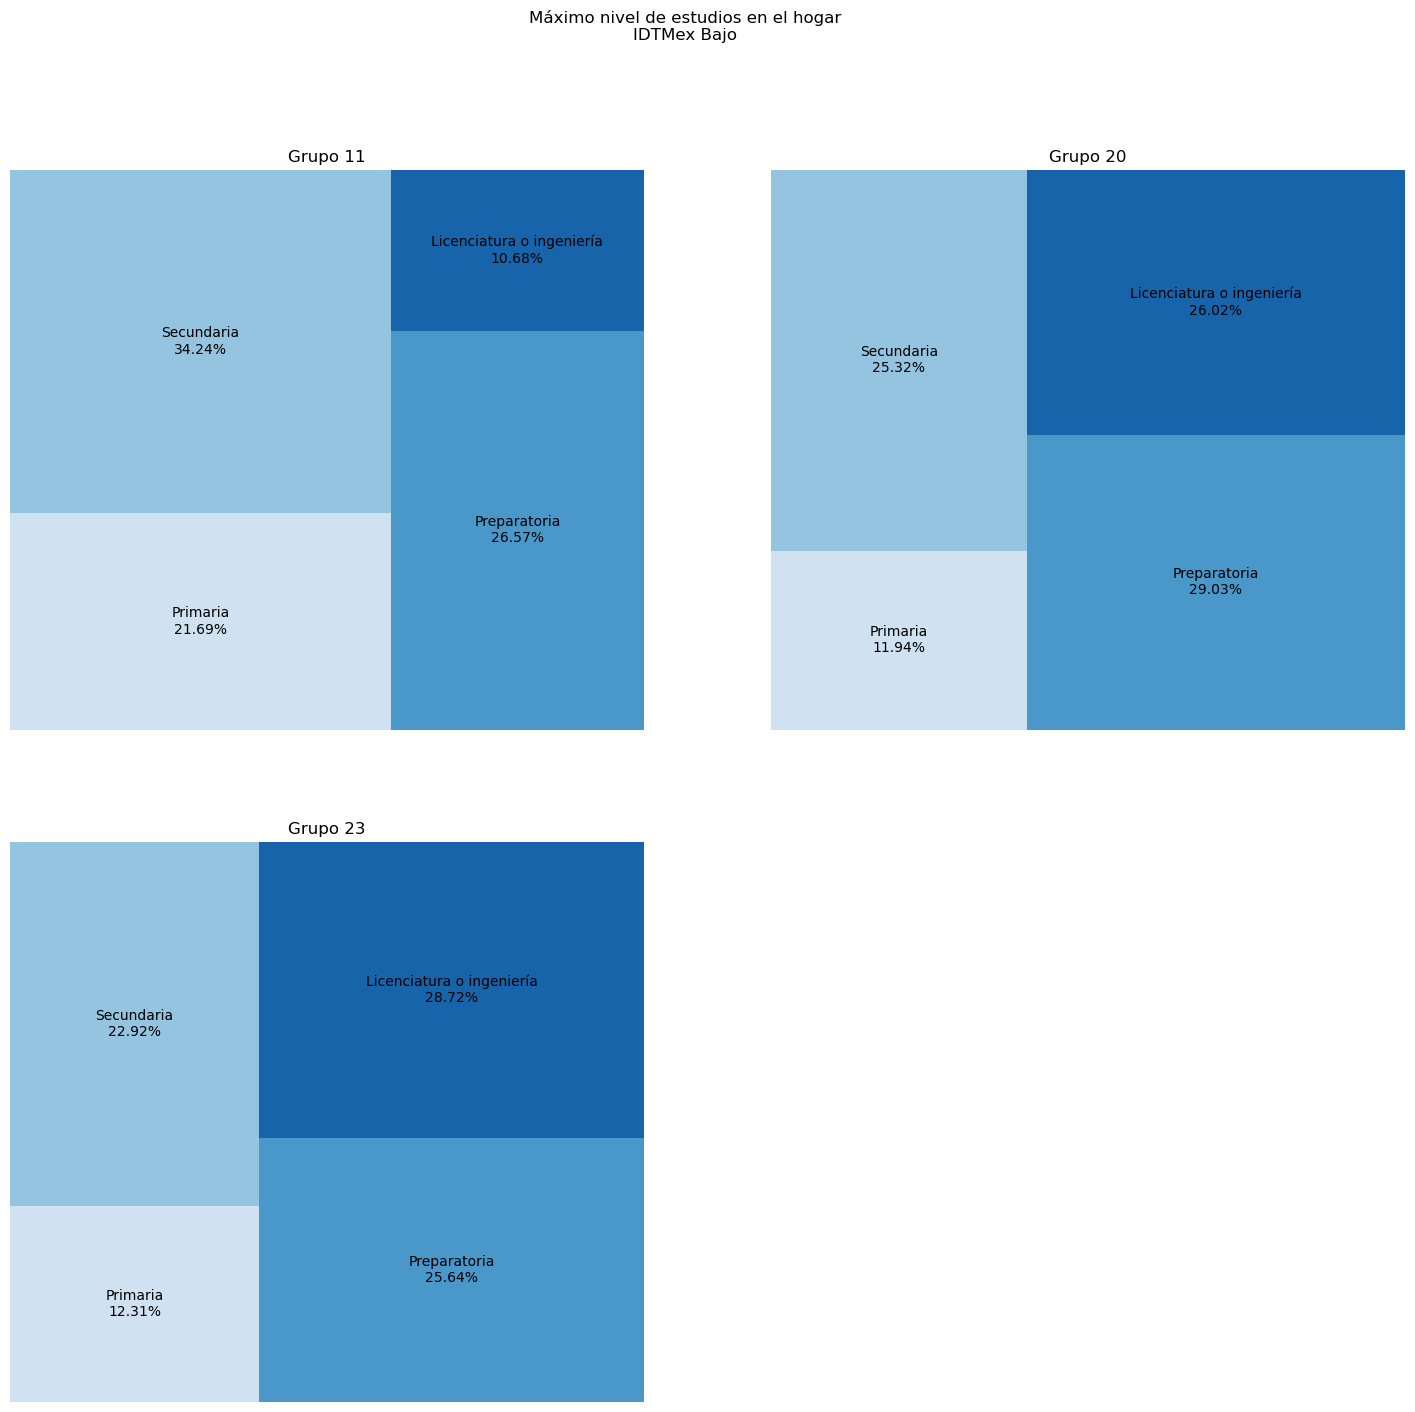

In [31]:
gpos = bajo["Grupo"].nunique()
cols = int(np.ceil(gpos/2))

plt.figure(figsize=(9*cols,8*2))

for i,grupo in enumerate(bajo["Grupo"].unique()):
    plt.subplot(2,cols,i+1)
    df_tmp = bajo[bajo["Grupo"]==grupo].groupby("maxNIVEL")[["FAC_HOG"]].sum().reset_index()
    df_tmp = df_tmp[df_tmp["FAC_HOG"]>0]
    df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()
    df_tmp = df_tmp[df_tmp.maxNIVEL.isin([2,3,6,8])]
    labs = [f"{niveles[clas]}\n{perc:.2%}" for clas,perc in zip(df_tmp["maxNIVEL"], df_tmp["perc"])]
    squarify.plot(sizes=df_tmp['FAC_HOG'], label=labs, color=sns.color_palette("Blues",4))
    plt.axis('off')
    plt.title(f"Grupo {grupo}")
    
plt.suptitle(f"Máximo nivel de estudios en el hogar\nIDTMex Bajo")
plt.show()

### Movilidad educacional

In [53]:
df_tmp = bajo#[bajo.maxNIVEL.isin([2,3,6,8])]
comp_niveles = pd.pivot_table(df_tmp, index="maxNIVEL", columns="NIVEL", values="FAC_HOG", aggfunc="sum")
comp_niveles.index = pd.Series(comp_niveles.index).replace(niveles, regex=True)
comp_niveles.index = pd.CategoricalIndex(comp_niveles.index, categories=niveles.values())
comp_niveles.columns = pd.Series(comp_niveles.columns).replace(niveles, regex=True)
comp_niveles

NIVEL,Ninguno,Preescolar,Primaria,Secundaria,Normal básica,Estudio técnico,Preparatoria,Estudio técnico superior,Licenciatura o ingeniería,Especialidad,Maestría,Doctorado
maxNIVEL,,,,,,,,,,,,
Ninguno,706647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Preescolar,3556.0,2339.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primaria,545101.0,4778.0,3020211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Secundaria,596632.0,12580.0,2487244.0,3658355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal básica,NaN,NaN,3624.0,3520.0,15858.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estudio técnico,6027.0,NaN,54232.0,51885.0,715.0,120501.0,NaN,NaN,NaN,NaN,NaN,NaN
Preparatoria,371064.0,7601.0,1938475.0,2004833.0,9462.0,49454.0,2478621.0,NaN,NaN,NaN,NaN,NaN
Estudio técnico superior,20413.0,NaN,100938.0,94433.0,NaN,3464.0,68941.0,178979.0,NaN,NaN,NaN,NaN
Licenciatura o ingeniería,134023.0,2476.0,1034570.0,1127873.0,17871.0,54825.0,711827.0,102244.0,2056500.0,NaN,NaN,NaN


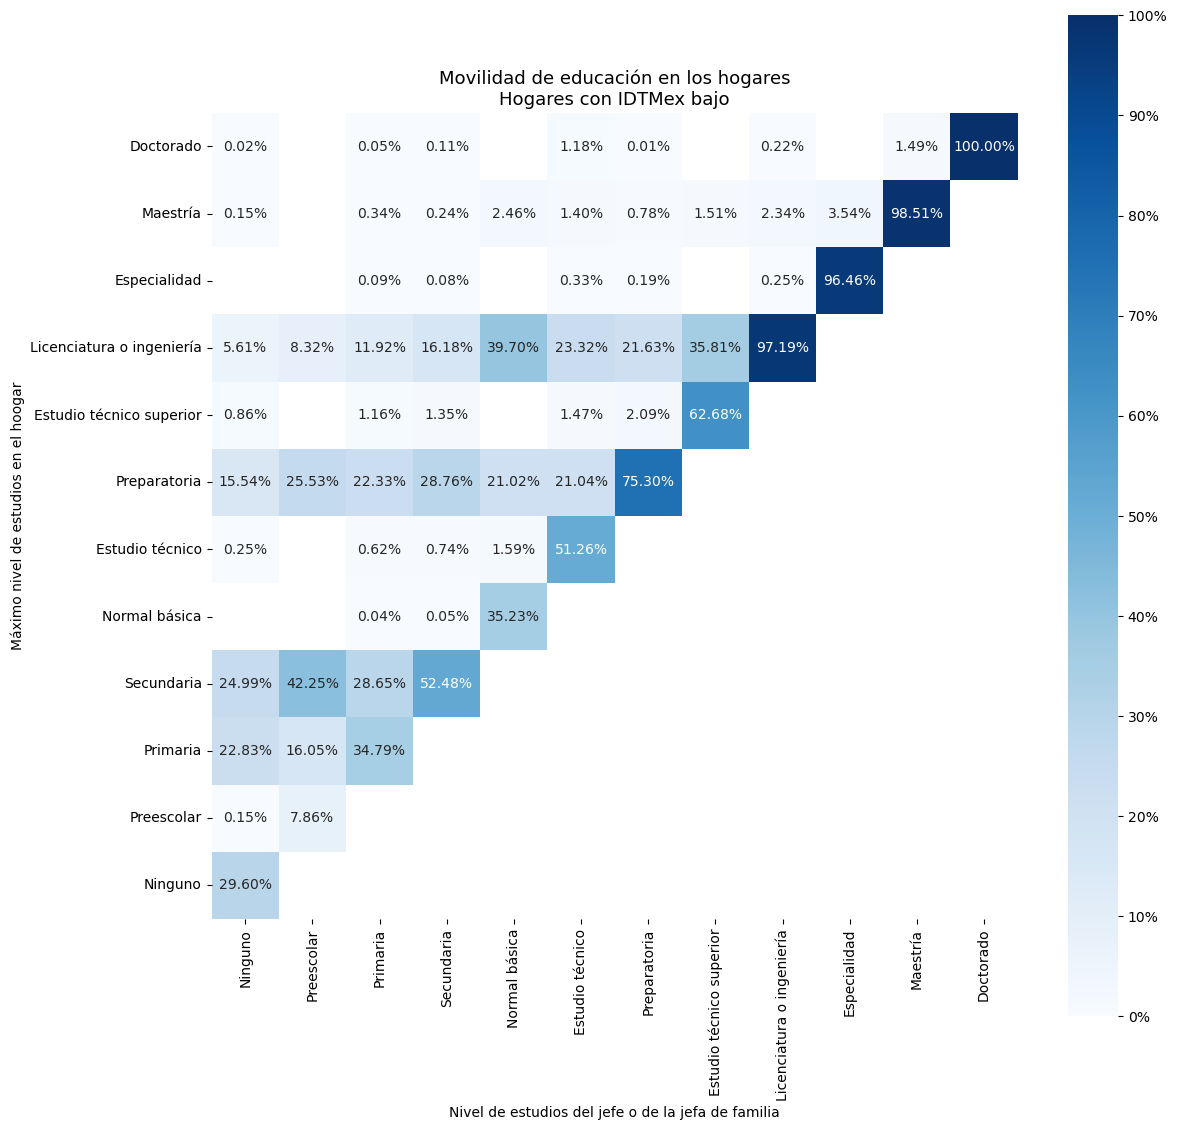

In [61]:
plt.figure(figsize=(13,13), )

ax = sns.heatmap(comp_niveles.div(comp_niveles.sum(axis=0)).sort_index(ascending=False), annot=True, fmt=".2%", cmap="Blues")
ax.tick_params(axis='y', labelrotation=0)
cbar = ax.collections[0].colorbar
cbar.set_ticks([x/100 for x in range(0,101,10)])
cbar.set_ticklabels([f"{x/100:.0%}" for x in range(0,101,10)])
plt.gca().set_aspect('equal')

plt.xlabel("Nivel de estudios del jefe o de la jefa de familia")
plt.ylabel("Máximo nivel de estudios en el hoogar")
plt.title("Movilidad de educación en los hogares\nHogares con IDTMex bajo", fontdict={"size":13})


plt.show()

### Grupos

In [ ]:
plt.figure(figsize=(9,8))
df_tmp = bajo.groupby("Grupo")[["FAC_HOG"]].sum().reset_index()
df_tmp = df_tmp[df_tmp["FAC_HOG"]>0]
df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()
labs = [f"Grupo {gpo}\n{perc:.2%}" for gpo,perc in zip(df_tmp["Grupo"], df_tmp["perc"])]
squarify.plot(sizes=df_tmp['FAC_HOG'], label=labs, color=sns.color_palette("Blues",4))
plt.axis('off')
plt.title(f"Máximo nivel de estudios en el hogar\nIDTMex Bajo")
plt.show()

## MEDIO

In [62]:
medio = jefe_hog[jefe_hog["clasificacion"]=="Medio"]
medio

,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P1_5_3,P2_1,P2_2,P2_3,...,P3_11,P3_12,FAC_HOGAR,acceso,uso,aptitudes,IDTMex,clasificacion,maxNIVEL,rgo_edad
40740,3,1,1,1,1,1,2,1,1,1.0,...,NaN,1.0,570,6.417494,6.442622,5.417137,6.227474,Medio,3.0,20-24
40741,3,1,1,1,1,1,2,4,1,1.0,...,4.0,NaN,212,6.417494,6.442622,5.417137,6.227474,Medio,3.0,65-69
40742,3,1,1,1,1,1,1,4,1,1.0,...,4.0,NaN,195,6.417494,6.442622,5.417137,6.227474,Medio,8.0,45-49
40743,3,1,1,1,1,2,1,5,2,2.0,...,NaN,1.0,246,6.417494,6.442622,5.417137,6.227474,Medio,3.0,25-29
40744,2,1,1,1,1,1,2,4,1,1.0,...,NaN,1.0,264,6.417494,6.442622,5.417137,6.227474,Medio,6.0,55-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57844,3,1,1,1,1,1,1,2,1,1.0,...,NaN,1.0,439,6.971433,7.156436,7.934896,7.238127,Medio,8.0,55-59
57845,2,1,1,1,1,1,2,1,1,1.0,...,4.0,NaN,1547,6.971433,7.156436,7.934896,7.238127,Medio,2.0,70-74
57846,3,1,2,1,1,1,1,4,1,1.0,...,NaN,1.0,379,6.971433,7.156436,7.934896,7.238127,Medio,10.0,40-44
57847,3,1,2,1,1,2,2,1,1,1.0,...,NaN,1.0,343,6.971433,7.156436,7.934896,7.238127,Medio,8.0,60-64


### SEXO Y EDAD

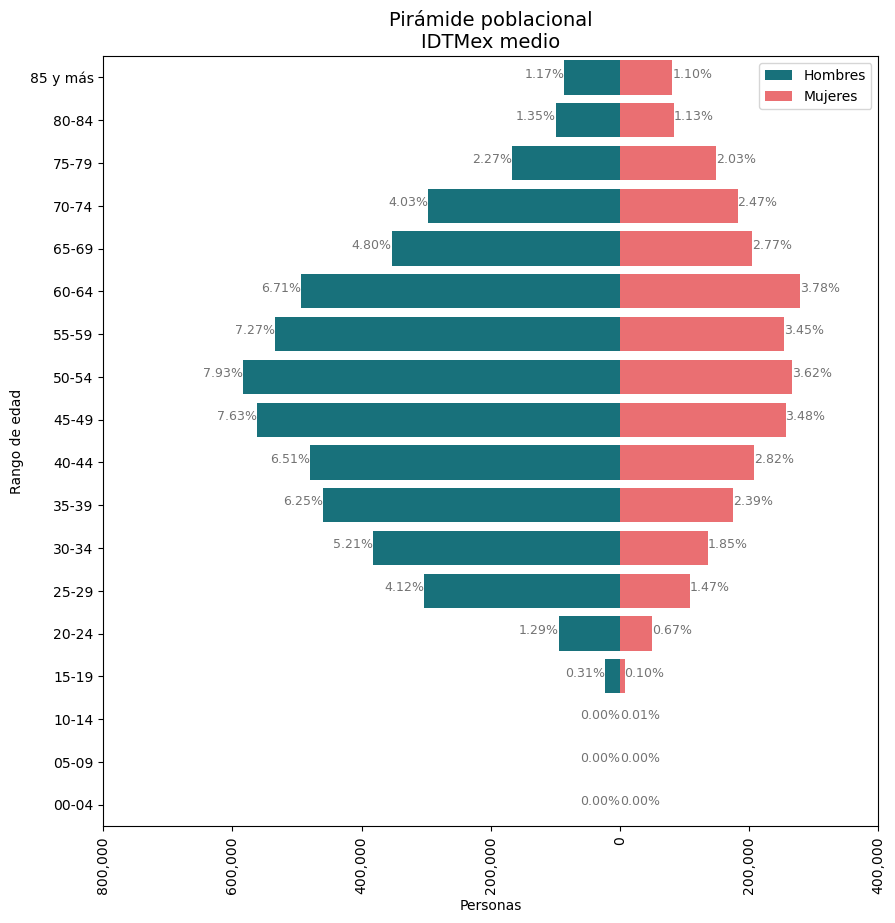

In [63]:
plt.figure(figsize=(10,10))
df_tmp = medio.groupby(["rgo_edad","SEXO"])[["FAC_HOGAR"]].sum().reset_index()
df_tmp["perc"] = df_tmp["FAC_HOGAR"]/df_tmp["FAC_HOGAR"].sum()
df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"] = -df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"]
sns.barplot(df_tmp[df_tmp.SEXO==1], y="rgo_edad", x="FAC_HOGAR", color="#087E8B",label="Hombres")
for idx in df_tmp[df_tmp.SEXO==1].index:
    nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
    FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
    perc = df_tmp.loc[idx,["perc"]].to_list()[0]
    plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9,horizontalalignment="right")



sns.barplot(df_tmp[df_tmp.SEXO==2], y="rgo_edad", x="FAC_HOGAR", color="#FF5A5F",label="Mujeres")
for idx in df_tmp[df_tmp.SEXO==2].index:
    nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
    FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
    perc = df_tmp.loc[idx,["perc"]].to_list()[0]
    plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9)

plt.ylabel("Rango de edad")
plt.xlabel("Personas")
curr_ticks = plt.gca().get_xticks()
plt.xticks(ticks=curr_ticks,labels=[f"{abs(x):,.0f}" for x in curr_ticks],rotation=90)

#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.legend()
plt.title("Pirámide poblacional\nIDTMex medio", size=14)
plt.show()


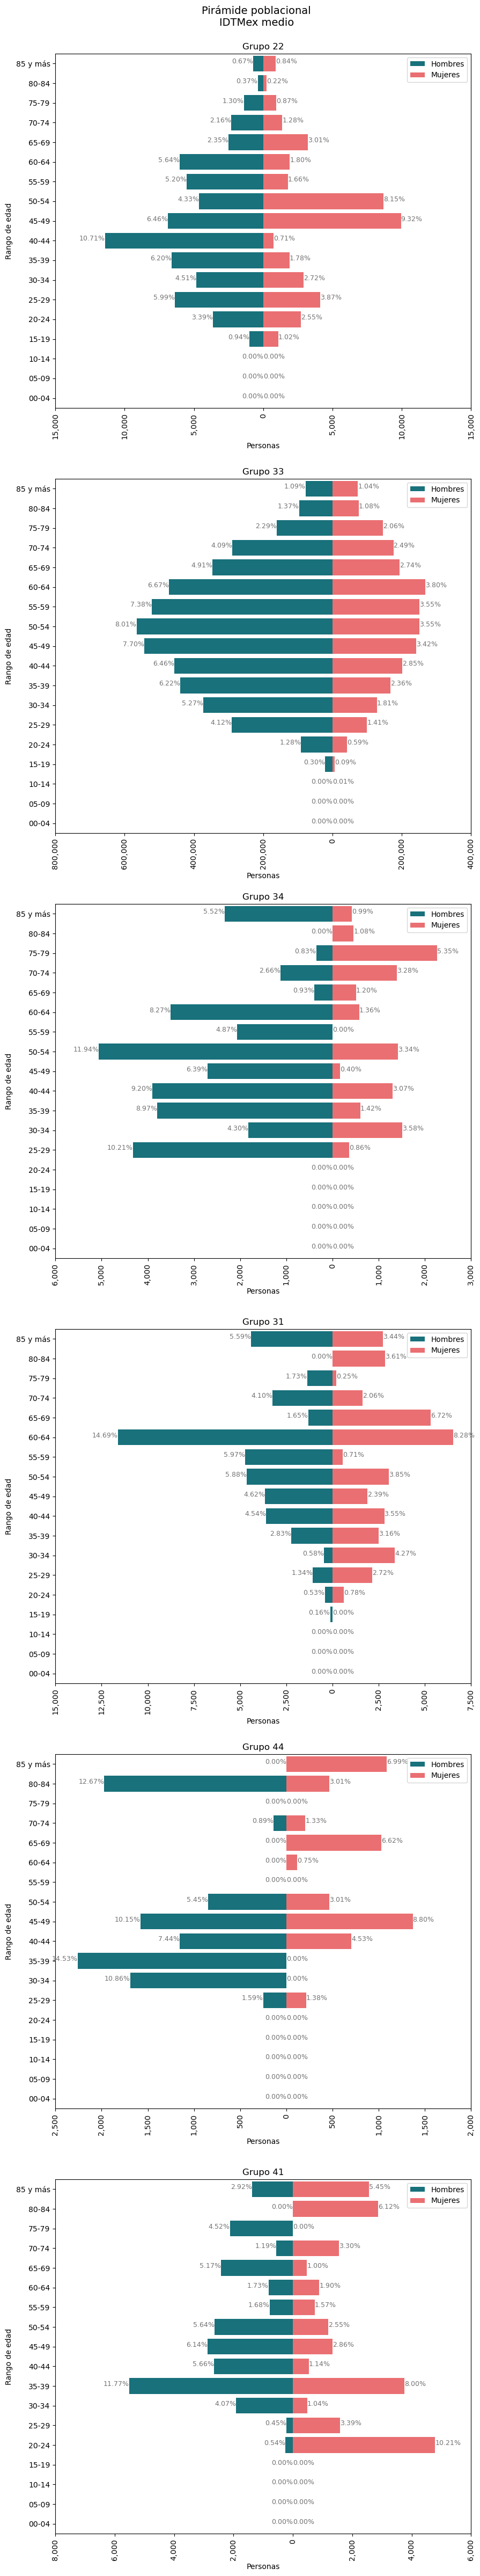

In [64]:
gpos = medio["Grupo"].nunique()

plt.figure(figsize=(10,10*gpos))


for i,grupo in enumerate(medio["Grupo"].unique()):
    plt.subplot(gpos,1,i+1)
    df_tmp = medio[medio["Grupo"] == grupo].groupby(["rgo_edad","SEXO"])[["FAC_HOGAR"]].sum().reset_index()
    df_tmp["perc"] = df_tmp["FAC_HOGAR"]/df_tmp["FAC_HOGAR"].sum()
    df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"] = -df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"]
    sns.barplot(df_tmp[df_tmp.SEXO==1], y="rgo_edad", x="FAC_HOGAR", color="#087E8B",label="Hombres")
    for idx in df_tmp[df_tmp.SEXO==1].index:
        nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
        FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
        perc = df_tmp.loc[idx,["perc"]].to_list()[0]
        plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9,horizontalalignment="right")



    sns.barplot(df_tmp[df_tmp.SEXO==2], y="rgo_edad", x="FAC_HOGAR", color="#FF5A5F",label="Mujeres")
    for idx in df_tmp[df_tmp.SEXO==2].index:
        nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
        FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
        perc = df_tmp.loc[idx,["perc"]].to_list()[0]
        plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9)

    plt.ylabel("Rango de edad")
    plt.xlabel("Personas")
    curr_ticks = plt.gca().get_xticks()
    plt.xticks(ticks=curr_ticks,labels=[f"{abs(x):,.0f}" for x in curr_ticks],rotation=90)
    
    plt.title(f"Grupo {grupo}")

#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.legend()
plt.suptitle("Pirámide poblacional\nIDTMex medio", size=14, y=0.895)
plt.show()


### NIVEL EDUCATIVO MAXIMO

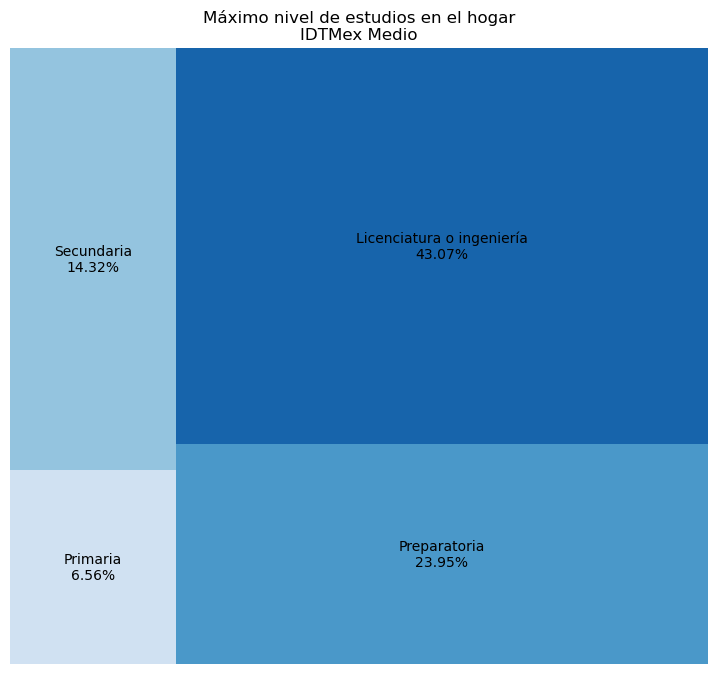

In [65]:
plt.figure(figsize=(9,8))
df_tmp = medio.groupby("maxNIVEL")[["FAC_HOG"]].sum().reset_index()
df_tmp = df_tmp[df_tmp["FAC_HOG"]>0]
df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()
df_tmp = df_tmp[df_tmp.maxNIVEL.isin([2,3,6,8])]
labs = [f"{niveles[clas]}\n{perc:.2%}" for clas,perc in zip(df_tmp["maxNIVEL"], df_tmp["perc"])]
squarify.plot(sizes=df_tmp['FAC_HOG'], label=labs, color=sns.color_palette("Blues",4))
plt.axis('off')
plt.title(f"Máximo nivel de estudios en el hogar\nIDTMex Medio")
plt.show()

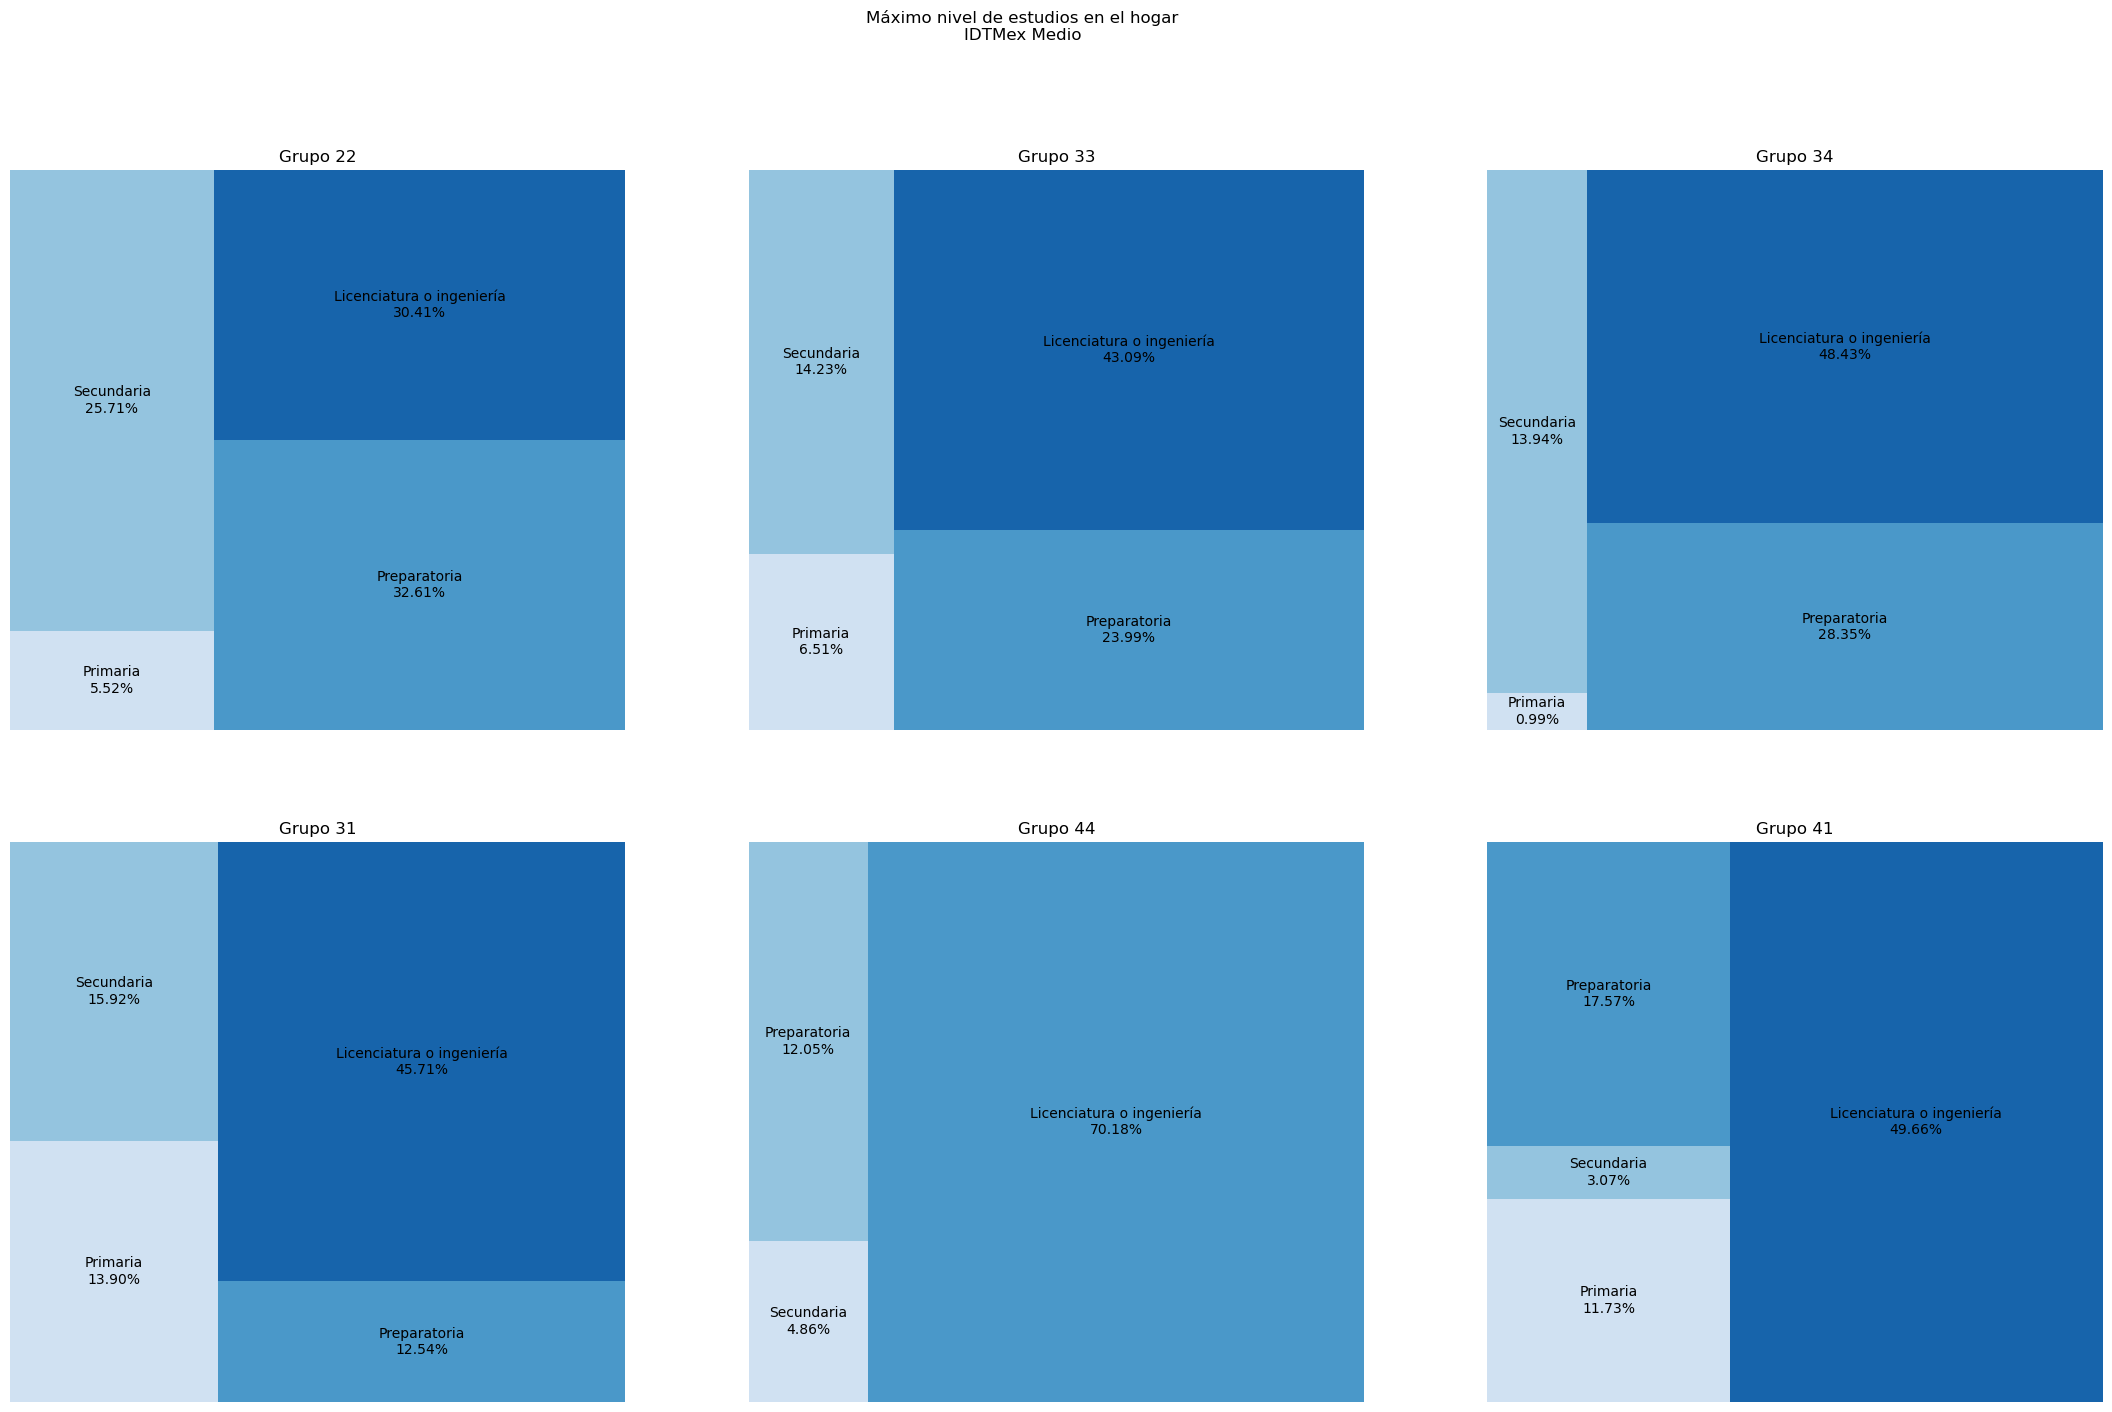

In [66]:
gpos = medio["Grupo"].nunique()
cols = int(np.ceil(gpos/2))

plt.figure(figsize=(9*cols,8*2))

for i,grupo in enumerate(medio["Grupo"].unique()):
    plt.subplot(2,cols,i+1)
    df_tmp = medio[medio["Grupo"]==grupo].groupby("maxNIVEL")[["FAC_HOG"]].sum().reset_index()
    df_tmp = df_tmp[df_tmp["FAC_HOG"]>0]
    df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()
    df_tmp = df_tmp[df_tmp.maxNIVEL.isin([2,3,6,8])]
    labs = [f"{niveles[clas]}\n{perc:.2%}" for clas,perc in zip(df_tmp["maxNIVEL"], df_tmp["perc"])]
    squarify.plot(sizes=df_tmp['FAC_HOG'], label=labs, color=sns.color_palette("Blues",4))
    plt.axis('off')
    plt.title(f"Grupo {grupo}")
    
plt.suptitle(f"Máximo nivel de estudios en el hogar\nIDTMex Medio")
plt.show()

### Movilidad educacional

In [67]:
df_tmp = medio#[bajo.maxNIVEL.isin([2,3,6,8])]
comp_niveles = pd.pivot_table(df_tmp, index="maxNIVEL", columns="NIVEL", values="FAC_HOG", aggfunc="sum")
comp_niveles.index = pd.Series(comp_niveles.index).replace(niveles, regex=True)
comp_niveles.index = pd.CategoricalIndex(comp_niveles.index, categories=niveles.values())
comp_niveles.columns = pd.Series(comp_niveles.columns).replace(niveles, regex=True)
comp_niveles

NIVEL,Ninguno,Preescolar,Primaria,Secundaria,Normal básica,Estudio técnico,Preparatoria,Estudio técnico superior,Licenciatura o ingeniería,Especialidad,Maestría,Doctorado
maxNIVEL,,,,,,,,,,,,
Ninguno,48377.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primaria,25332.0,847.0,456169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Secundaria,34492.0,868.0,278611.0,739818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal básica,NaN,NaN,1335.0,2853.0,13936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estudio técnico,1407.0,NaN,23272.0,35614.0,472.0,92608.0,NaN,NaN,NaN,NaN,NaN,NaN
Preparatoria,26650.0,612.0,309997.0,483922.0,2692.0,31987.0,905321.0,NaN,NaN,NaN,NaN,NaN
Estudio técnico superior,3782.0,NaN,30635.0,48393.0,NaN,5786.0,38986.0,106904.0,NaN,NaN,NaN,NaN
Licenciatura o ingeniería,25196.0,NaN,289356.0,432008.0,10188.0,74520.0,459661.0,95144.0,1783087.0,NaN,NaN,NaN
Especialidad,NaN,NaN,1102.0,1404.0,NaN,NaN,3682.0,4507.0,3577.0,26167.0,NaN,NaN


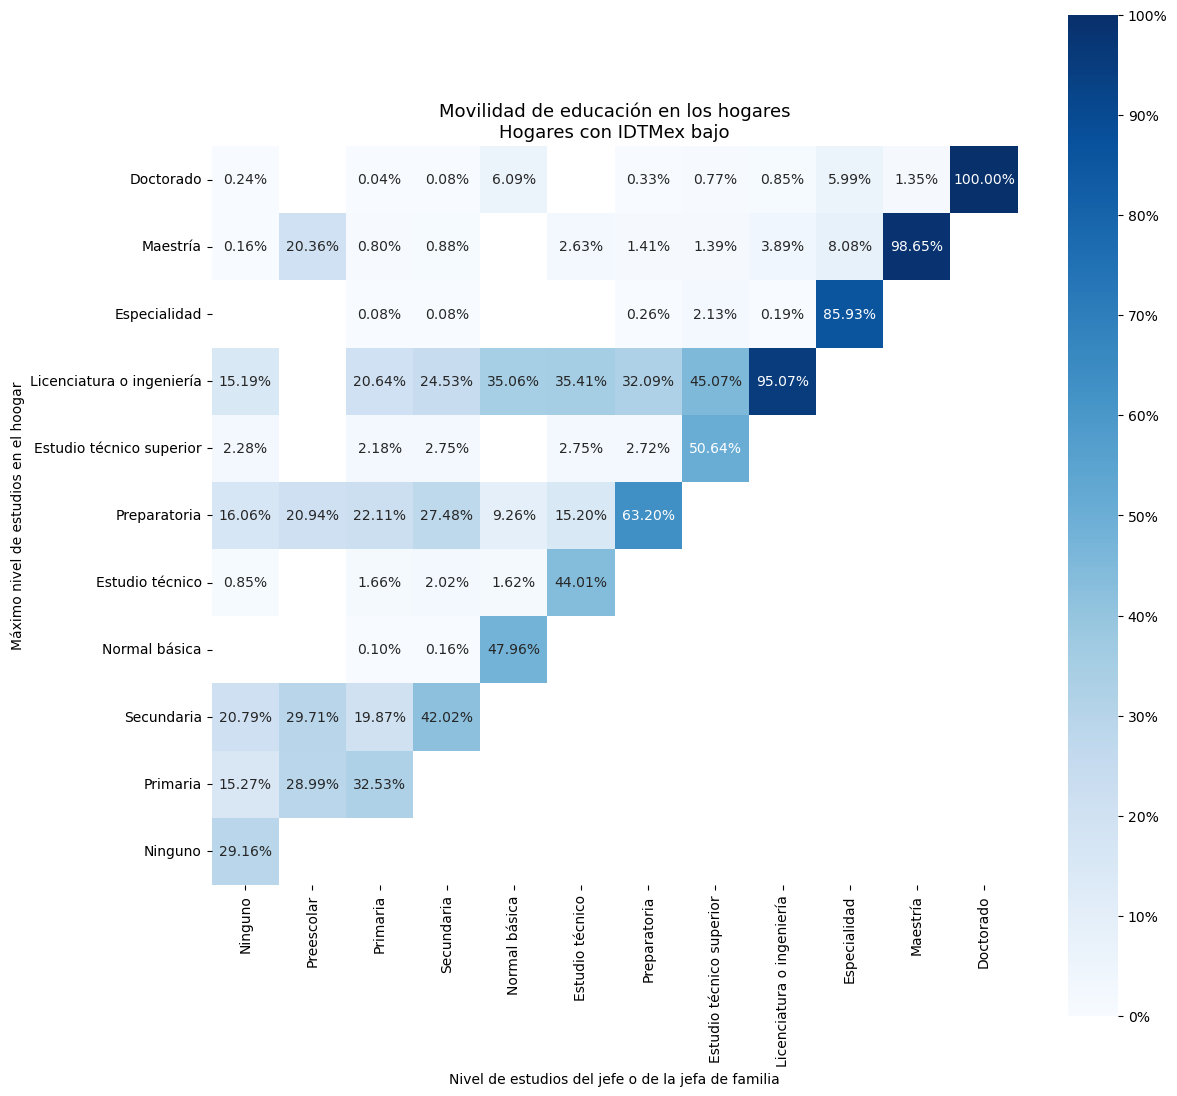

In [69]:
plt.figure(figsize=(13,13), )

ax = sns.heatmap(comp_niveles.div(comp_niveles.sum(axis=0)).sort_index(ascending=False), annot=True, fmt=".2%", cmap="Blues")
ax.tick_params(axis='y', labelrotation=0)
cbar = ax.collections[0].colorbar
cbar.set_ticks([x/100 for x in range(0,101,10)])
cbar.set_ticklabels([f"{x/100:.0%}" for x in range(0,101,10)])
plt.gca().set_aspect('equal')

plt.xlabel("Nivel de estudios del jefe o de la jefa de familia")
plt.ylabel("Máximo nivel de estudios en el hoogar")
plt.title("Movilidad de educación en los hogares\nHogares con IDTMex bajo", fontdict={"size":13})


plt.show()

## ALTO

In [70]:
alto = jefe_hog[jefe_hog["clasificacion"]=="Alto"]
alto

,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P1_5_3,P2_1,P2_2,P2_3,...,P3_11,P3_12,FAC_HOGAR,acceso,uso,aptitudes,IDTMex,clasificacion,maxNIVEL,rgo_edad
40404,2,1,2,1,1,1,1,4,1,1.0,...,NaN,1.0,661,9.139431,6.779304,5.940411,7.555576,Alto,8.0,50-54
40405,2,1,2,1,1,1,1,4,1,1.0,...,4.0,NaN,625,9.139431,6.779304,5.940411,7.555576,Alto,8.0,50-54
40406,3,1,2,1,1,1,1,5,1,1.0,...,4.0,NaN,625,9.139431,6.779304,5.940411,7.555576,Alto,6.0,80-84
40407,3,1,1,1,1,1,1,5,1,1.0,...,NaN,4.0,558,9.139431,6.779304,5.940411,7.555576,Alto,8.0,40-44
40408,2,1,1,1,1,1,1,7,2,2.0,...,NaN,2.0,616,9.139431,6.779304,5.940411,7.555576,Alto,6.0,45-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57739,3,1,1,1,1,1,1,5,1,1.0,...,NaN,1.0,1365,9.798233,8.185670,8.664343,8.926430,Alto,8.0,50-54
57740,3,1,2,1,1,1,1,2,1,1.0,...,NaN,4.0,396,9.798233,8.185670,8.664343,8.926430,Alto,6.0,55-59
57741,3,1,2,1,1,1,1,4,1,1.0,...,4.0,NaN,408,9.798233,8.185670,8.664343,8.926430,Alto,8.0,55-59
57742,3,1,2,1,1,1,2,3,1,1.0,...,NaN,1.0,400,9.798233,8.185670,8.664343,8.926430,Alto,6.0,45-49


### SEXO Y EDAD

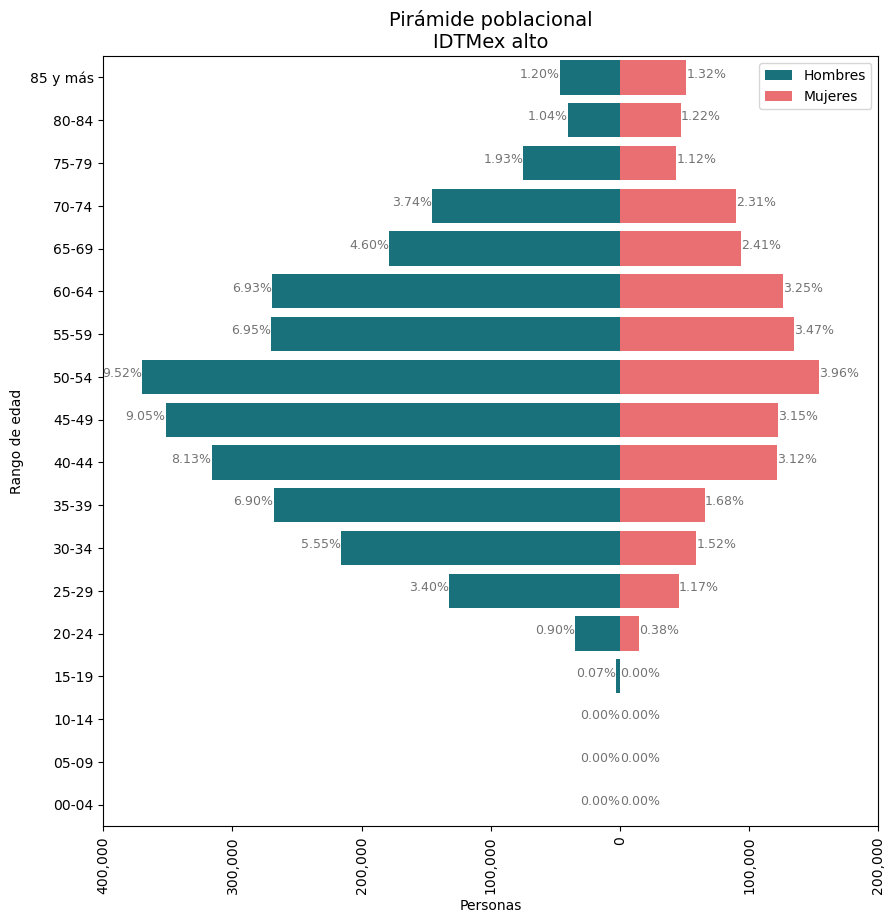

In [71]:
plt.figure(figsize=(10,10))
df_tmp = alto.groupby(["rgo_edad","SEXO"])[["FAC_HOGAR"]].sum().reset_index()
df_tmp["perc"] = df_tmp["FAC_HOGAR"]/df_tmp["FAC_HOGAR"].sum()
df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"] = -df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"]
sns.barplot(df_tmp[df_tmp.SEXO==1], y="rgo_edad", x="FAC_HOGAR", color="#087E8B",label="Hombres")
for idx in df_tmp[df_tmp.SEXO==1].index:
    nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
    FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
    perc = df_tmp.loc[idx,["perc"]].to_list()[0]
    plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9,horizontalalignment="right")



sns.barplot(df_tmp[df_tmp.SEXO==2], y="rgo_edad", x="FAC_HOGAR", color="#FF5A5F",label="Mujeres")
for idx in df_tmp[df_tmp.SEXO==2].index:
    nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
    FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
    perc = df_tmp.loc[idx,["perc"]].to_list()[0]
    plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9)

plt.ylabel("Rango de edad")
plt.xlabel("Personas")
curr_ticks = plt.gca().get_xticks()
plt.xticks(ticks=curr_ticks,labels=[f"{abs(x):,.0f}" for x in curr_ticks],rotation=90)

#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.legend()
plt.title("Pirámide poblacional\nIDTMex alto", size=14)
plt.show()


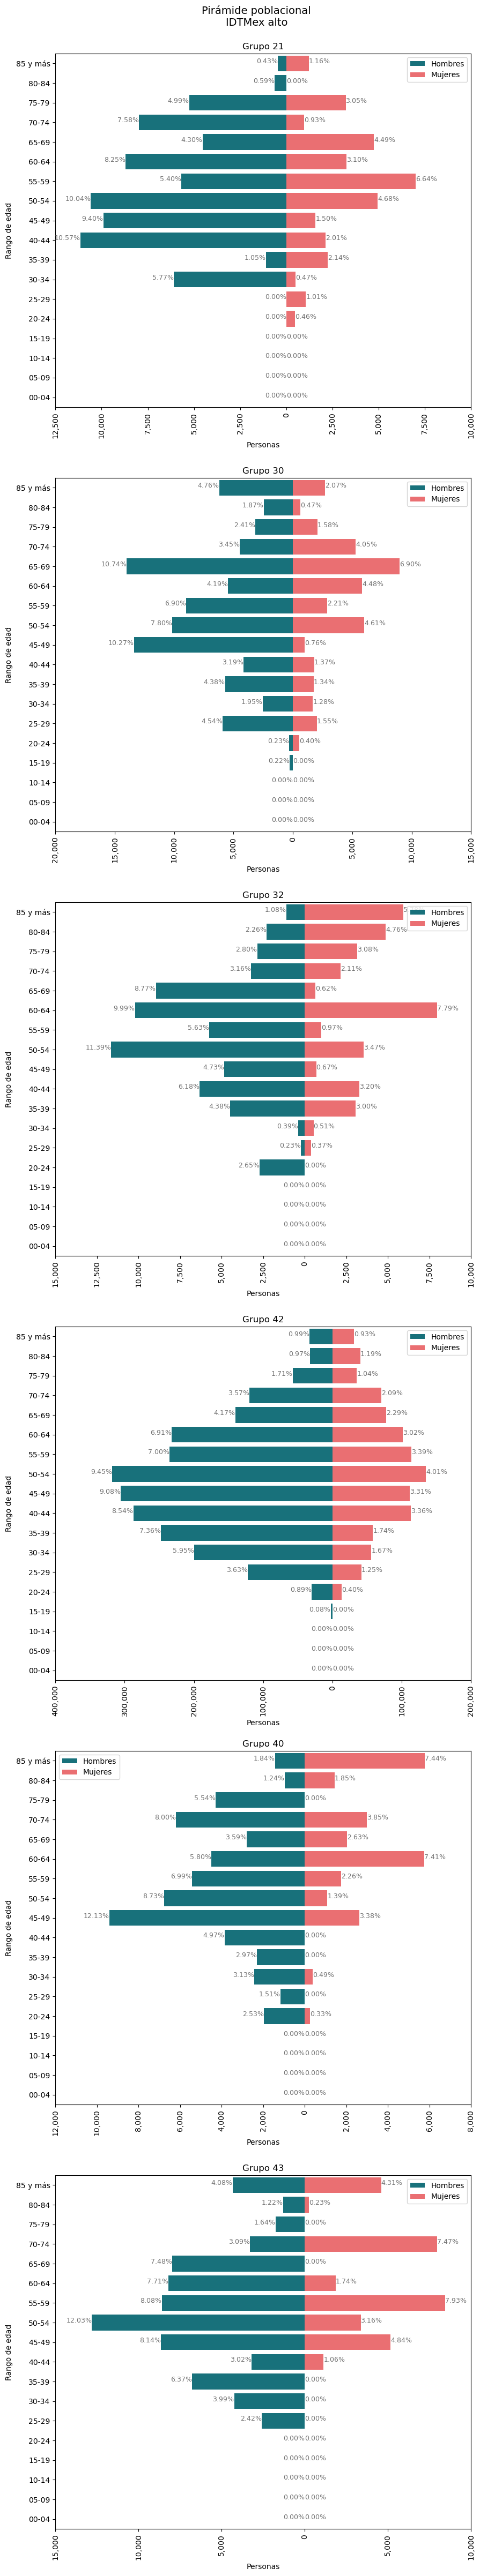

In [72]:
gpos = alto["Grupo"].nunique()

plt.figure(figsize=(10,10*gpos))


for i,grupo in enumerate(alto["Grupo"].unique()):
    plt.subplot(gpos,1,i+1)
    df_tmp = alto[alto["Grupo"] == grupo].groupby(["rgo_edad","SEXO"])[["FAC_HOGAR"]].sum().reset_index()
    df_tmp["perc"] = df_tmp["FAC_HOGAR"]/df_tmp["FAC_HOGAR"].sum()
    df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"] = -df_tmp.loc[df_tmp.SEXO==1,"FAC_HOGAR"]
    sns.barplot(df_tmp[df_tmp.SEXO==1], y="rgo_edad", x="FAC_HOGAR", color="#087E8B",label="Hombres")
    for idx in df_tmp[df_tmp.SEXO==1].index:
        nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
        FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
        perc = df_tmp.loc[idx,["perc"]].to_list()[0]
        plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9,horizontalalignment="right")



    sns.barplot(df_tmp[df_tmp.SEXO==2], y="rgo_edad", x="FAC_HOGAR", color="#FF5A5F",label="Mujeres")
    for idx in df_tmp[df_tmp.SEXO==2].index:
        nivel = df_tmp.loc[idx,["rgo_edad"]].to_list()[0]
        FAC_HOGAR = df_tmp.loc[idx,["FAC_HOGAR"]].to_list()[0]
        perc = df_tmp.loc[idx,["perc"]].to_list()[0]
        plt.text(y=nivel , x =FAC_HOGAR , s=f"{perc:.2%}", color="#737373", fontsize=9)

    plt.ylabel("Rango de edad")
    plt.xlabel("Personas")
    curr_ticks = plt.gca().get_xticks()
    plt.xticks(ticks=curr_ticks,labels=[f"{abs(x):,.0f}" for x in curr_ticks],rotation=90)
    
    plt.title(f"Grupo {grupo}")

#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.legend()
plt.suptitle("Pirámide poblacional\nIDTMex alto", size=14, y=0.895)
plt.show()


### NIVEL EDUCATIVO MAXIMO

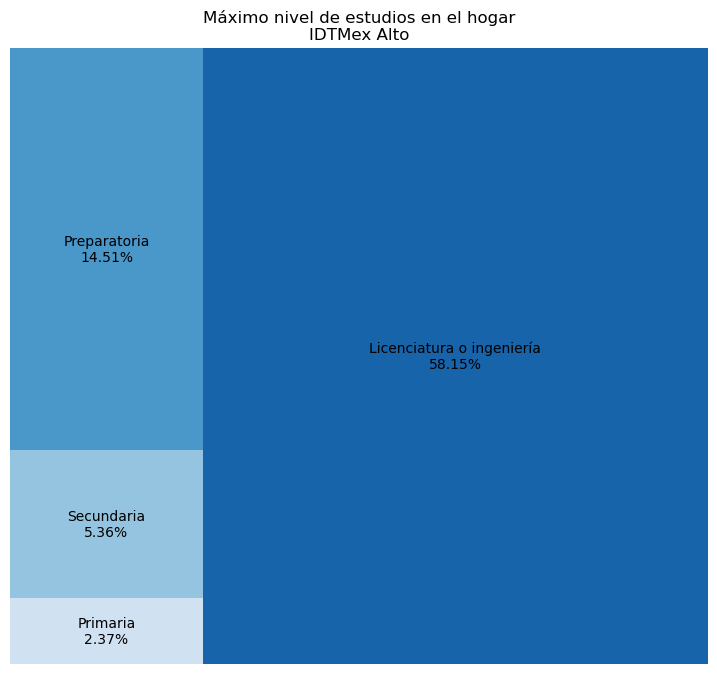

In [73]:
plt.figure(figsize=(9,8))
df_tmp = alto.groupby("maxNIVEL")[["FAC_HOG"]].sum().reset_index()
df_tmp = df_tmp[df_tmp["FAC_HOG"]>0]
df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()
df_tmp = df_tmp[df_tmp.maxNIVEL.isin([2,3,6,8])]
labs = [f"{niveles[clas]}\n{perc:.2%}" for clas,perc in zip(df_tmp["maxNIVEL"], df_tmp["perc"])]
squarify.plot(sizes=df_tmp['FAC_HOG'], label=labs, color=sns.color_palette("Blues",4))
plt.axis('off')
plt.title(f"Máximo nivel de estudios en el hogar\nIDTMex Alto")
plt.show()

### Movilidad educacional

In [75]:
df_tmp = alto#[bajo.maxNIVEL.isin([2,3,6,8])]
comp_niveles = pd.pivot_table(df_tmp, index="maxNIVEL", columns="NIVEL", values="FAC_HOG", aggfunc="sum")
comp_niveles.index = pd.Series(comp_niveles.index).replace(niveles, regex=True)
comp_niveles.index = pd.CategoricalIndex(comp_niveles.index, categories=niveles.values())
comp_niveles.columns = pd.Series(comp_niveles.columns).replace(niveles, regex=True)
comp_niveles

NIVEL,Ninguno,Preescolar,Primaria,Secundaria,Normal básica,Estudio técnico,Preparatoria,Estudio técnico superior,Licenciatura o ingeniería,Especialidad,Maestría,Doctorado
maxNIVEL,,,,,,,,,,,,
Ninguno,12675.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primaria,3634.0,NaN,88444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Secundaria,4371.0,NaN,34966.0,169122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal básica,NaN,NaN,711.0,NaN,3945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estudio técnico,245.0,NaN,9639.0,6525.0,NaN,43420.0,NaN,NaN,NaN,NaN,NaN,NaN
Preparatoria,3430.0,1182.0,55374.0,130007.0,815.0,16758.0,356339.0,NaN,NaN,NaN,NaN,NaN
Estudio técnico superior,NaN,NaN,5019.0,9048.0,NaN,3811.0,11452.0,66207.0,NaN,NaN,NaN,NaN
Licenciatura o ingeniería,11064.0,NaN,98595.0,149247.0,11289.0,35973.0,255812.0,62287.0,1636138.0,NaN,NaN,NaN
Especialidad,NaN,NaN,963.0,4103.0,NaN,566.0,2123.0,821.0,14640.0,54900.0,NaN,NaN


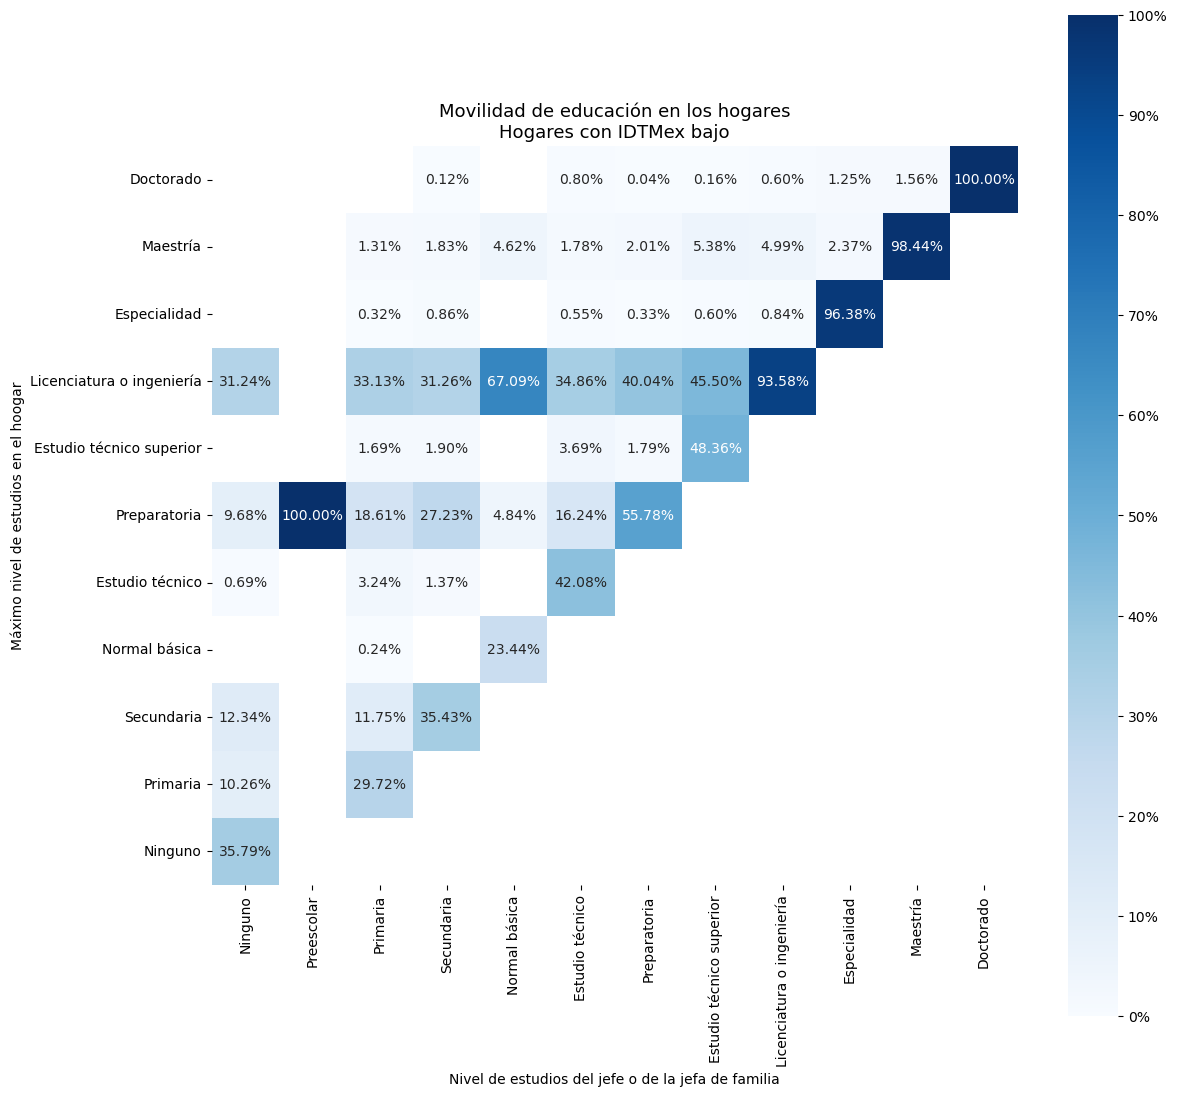

In [76]:
plt.figure(figsize=(13,13), )

ax = sns.heatmap(comp_niveles.div(comp_niveles.sum(axis=0)).sort_index(ascending=False), annot=True, fmt=".2%", cmap="Blues")
ax.tick_params(axis='y', labelrotation=0)
cbar = ax.collections[0].colorbar
cbar.set_ticks([x/100 for x in range(0,101,10)])
cbar.set_ticklabels([f"{x/100:.0%}" for x in range(0,101,10)])
plt.gca().set_aspect('equal')

plt.xlabel("Nivel de estudios del jefe o de la jefa de familia")
plt.ylabel("Máximo nivel de estudios en el hoogar")
plt.title("Movilidad de educación en los hogares\nHogares con IDTMex bajo", fontdict={"size":13})


plt.show()

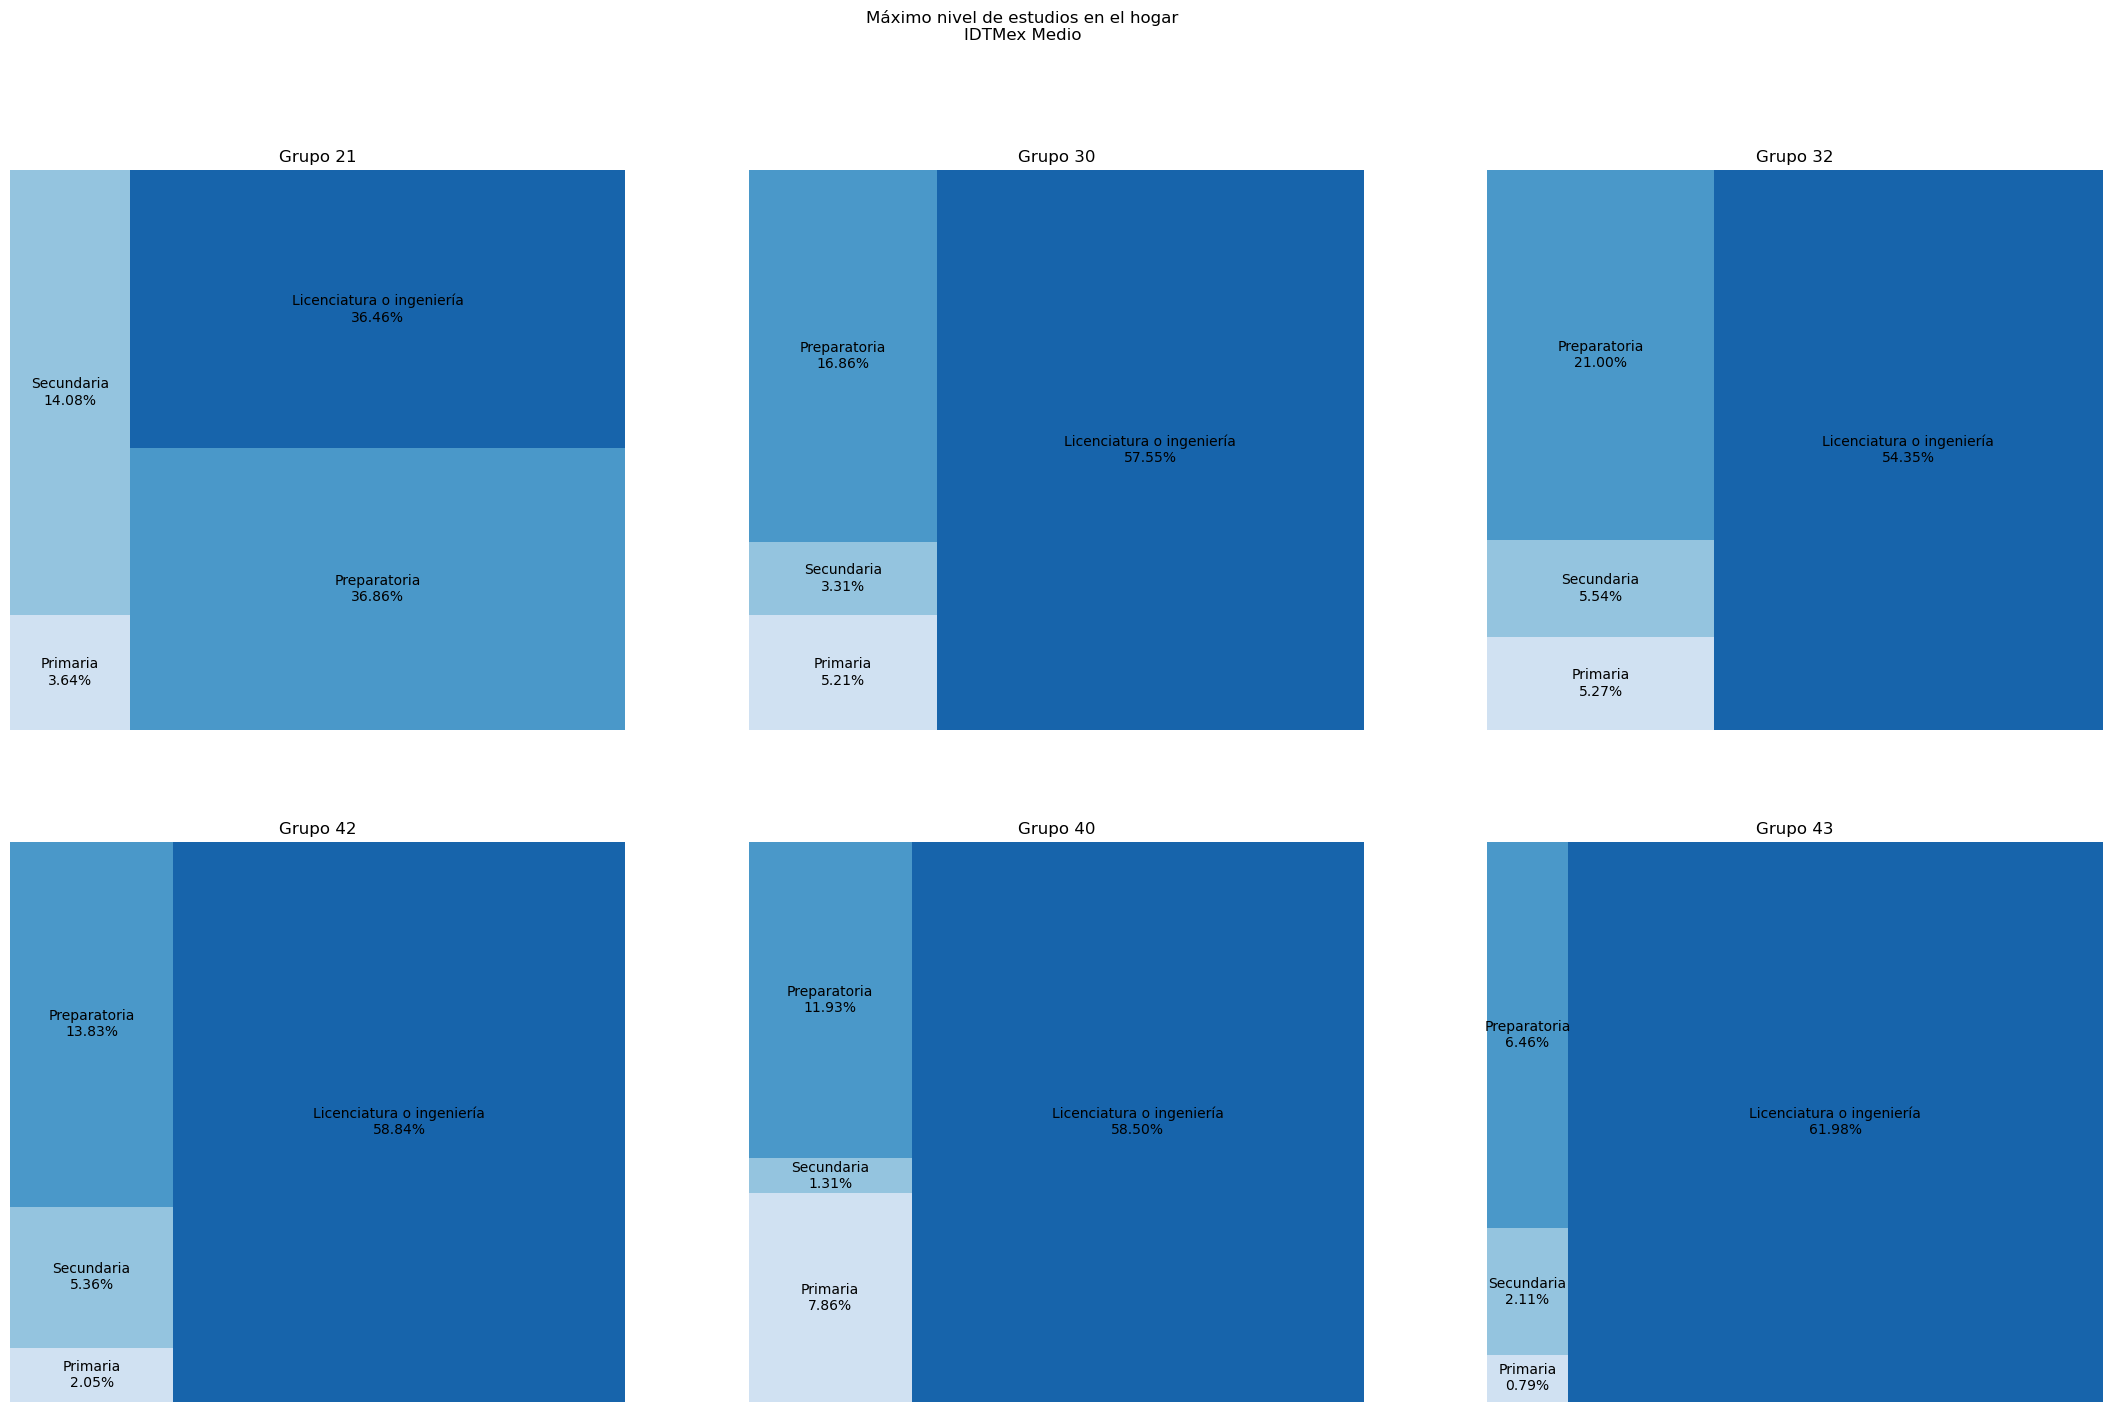

In [74]:
gpos = alto["Grupo"].nunique()
cols = int(np.ceil(gpos/2))

plt.figure(figsize=(9*cols,8*2))

for i,grupo in enumerate(alto["Grupo"].unique()):
    plt.subplot(2,cols,i+1)
    df_tmp = alto[alto["Grupo"]==grupo].groupby("maxNIVEL")[["FAC_HOG"]].sum().reset_index()
    df_tmp = df_tmp[df_tmp["FAC_HOG"]>0]
    df_tmp["perc"] = df_tmp["FAC_HOG"]/df_tmp["FAC_HOG"].sum()
    df_tmp = df_tmp[df_tmp.maxNIVEL.isin([2,3,6,8])]
    labs = [f"{niveles[clas]}\n{perc:.2%}" for clas,perc in zip(df_tmp["maxNIVEL"], df_tmp["perc"])]
    squarify.plot(sizes=df_tmp['FAC_HOG'], label=labs, color=sns.color_palette("Blues",4))
    plt.axis('off')
    plt.title(f"Grupo {grupo}")
    
plt.suptitle(f"Máximo nivel de estudios en el hogar\nIDTMex Medio")
plt.show()